In [7]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

### 938. Range Sum of BST
Given the root node of a binary search tree and two integers low and high, return the sum of values of all nodes with a value in the inclusive range [low, high].

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = [10,5,15,3,7,null,18]
low, high = 7, 15
# in-order traversal
# note: low<=high, root (e.g., 10) is given 
class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        stack = [root]
        res = 0
        while stack:
            node = stack.pop()
            if node:
                if low <= node.val <= high:
                    res += node.val
                if low <= node.val:
                    stack.append(node.left)
                if node.val <= high:
                    stack.append(node.right)
        return res
# recursion approach time complexity O(N)
class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        def dfs(node):
            if not node:
                return 0
            if node.val <= low:
                return dfs(node.right)
            elif node.val >= high:
                return dfs(node.left)
            else:
                return dfs(node.left) + dfs(node.right) + node.val
        return dfs(root)

### 872. Leaf-Similar Trees
Consider all the leaves of a binary tree, from left to right order, the values of those leaves form a leaf value sequence. <br>
https://leetcode.com/problems/leaf-similar-trees/
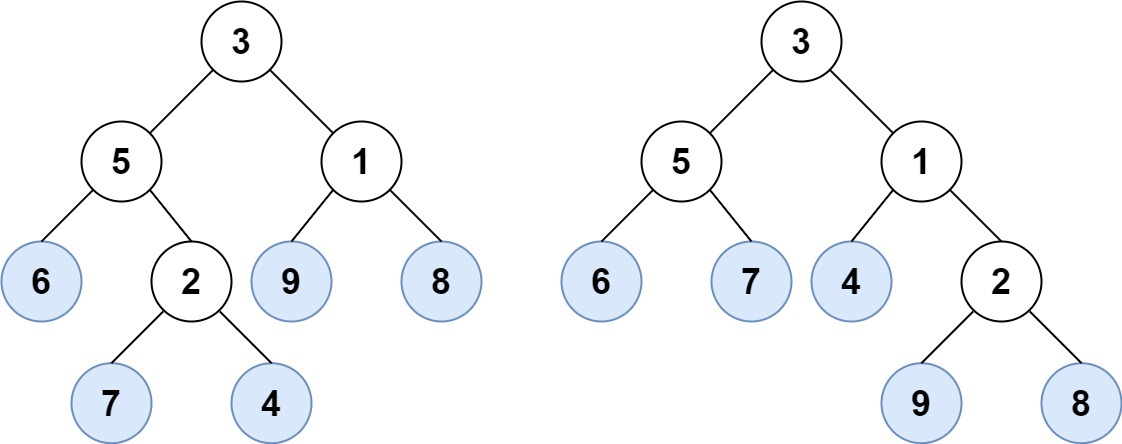

In [4]:
root1 = [3,5,1,6,2,9,8,null,null,7,4]
root2 = [3,5,1,6,7,4,2,null,null,null,null,null,null,9,8]

# recursion, depth-first
class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def dfs(node):
            if not node: return []
            if not node.left and not node.right:
                return [node.val]
            return dfs(node.left) + dfs(node.right)
        leaf1 = dfs(root1)
        leaf2 = dfs(root2)
        return leaf1 == leaf2
    
# iterative, preorder
class Solution2:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def leafs(root):
            if not root: return 
            stack = [root]
            leaf = []
            while stack:
                node = stack.pop()
                if not node:
                    continue
                stack.append(node.right)
                stack.append(node.left)
                if not node.left and not node.right:
                    leaf.append(node.val)
            return leaf
        return leafs(root1) == leafs(root2)

### 1026. Maximum Difference Between Node and Ancestor
Given the root of a binary tree, find the maximum value v for which there exist different nodes a and b where v = |a.val - b.val| and a is an ancestor of b. <br>
A node a is an ancestor of b if either: any child of a is equal to b or any child of a is an ancestor of b.<br>
https://leetcode.com/problems/maximum-difference-between-node-and-ancestor/

In [ ]:
root = [8,3,10,1,6,null,14,null,null,4,7,13]
# recursion
class Solution:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        def dfs(root, mini, maxi):
            if not root:return 0
            # maxium difference can be found wit the current node
            res = max(abs(root.val - mini), abs(maxi - root.val))
            # re-calculate the minimum and maximum values
            mini = min(mini, root.val)
            maxi = max(maxi, root.val)
            # recurse left and right with the updated maximum and minimum values
            return max(res, dfs(root.left, mini, maxi), dfs(root.right, mini, maxi))
        return dfs(root, root.val, root.val)

# iteration
class Solution2:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        stack = [(root, root.val, root.val)]  # node, parent, child
        res = 0
        while stack:
            node, parent, child = stack.pop()
            res = max(res, abs(parent - child))
            if node.left:
                stack.append((node.left, max(parent, node.left.val), min(child, node.left.val)))
            if node.right:
                stack.append((node.right, max(parent, node.right.val), min(child, node.right.val)))
        return res

### 1339. Maximum Product of Splitted Binary Tree
Given the root of a binary tree, split the binary tree into two subtrees by removing one edge such that the product of the sums of the subtrees is maximized.<br>
Return the maximum product of the sums of the two subtrees. Since the answer may be too large, return it modulo 109 + 7.<br>
Note that you need to maximize the answer before taking the mod and not after taking it.<br>
https://leetcode.com/problems/maximum-product-of-splitted-binary-tree/

In [ ]:
root = [1,2,3,4,5,6]
class Solution:
    def maxProduct(self, root: Optional[TreeNode]) -> int:
        # calculte total sum
        def dfsSum(root):
            if not root: return 0
            treeSum = root.val + dfsSum(root.left) + dfsSum(root.right)
            subTreeSum.append(treeSum)
            return treeSum
        subTreeSum = []
        total = dfsSum(root)
        res = 0
        for i in subTreeSum:
            res = max(res, i * (total - i))
        return res % (10**9 + 7)

### 124. Binary Tree Maximum Path Sum *Hard*
A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once.<br> 
Note that the path does not need to pass through the root.<br>
The path sum of a path is the sum of the node's values in the path.<br>
Given the root of a binary tree, return the maximum path sum of any non-empty path.

In [10]:
root = [-1,-2,10,-6,null,-3,-6]
# recursive solution dfs , time O(n)
class Solution:
    def __init__(self):
        self.res = float('-inf')
    def maxPathSum(self, root:[TreeNode]):
        def dfsSum(root):
            if not root: return 0
            left = dfsSum(root.left)
            right = dfsSum(root.right)
            self.res = max(self.res, root.val+left+right)
            return max(root.val + max(left, right), 0)
        dfsSum(root)
        return self.res
# iterative
from collection import defaultdict
class Solution2:
    def maxPathSum(self, root):
        res = float('-inf')
        stack, last, d = [], None, defaultdict(int)
        while root or stack:
            while root:
                stack.append(root)
                root = root.left
            node = stack[-1]
            if node.right and last != node.right:
                root = node.right
            else:
                node = stack.pop()
                last = node
                d[node] = max(0, max(d[node.left], d[node.right] + node.val))
                res = max(res, node.val + d[node.left] + d[node.right])
        return res

### 1971. Find if Path Exists in Graph
There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive).<br> The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi.<br> Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.<br>
You want to determine if there is a valid path that exists from vertex source to vertex destination.<br>
Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.<br>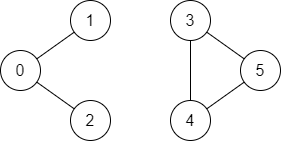

In [68]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
source = 0
destination = 5

In [57]:
# connetion matrix method, time O(n^3), space O(n^2)
def validPath(n, edges, source, destination):
    g = [[0]*n for _ in range(n)]
    for i in range(n):
        g[i][i] = 1
    # set diagnal element of the connection matrix to 1
    for i in range(n):
        for j in range(n):
            if [i, j] in edges:
                g[i][j], g[j][i] = 1, 1
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # if g[i][k] and g[k][i] both = 1, then i is connected to k
                g[i][j] = (g[i][j] | (g[i][k] and g[k][j]))
    print(g)
    return g[source][destination] == 1
validPath(n, edges, source, destination)

[[1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]


False

In [58]:
# BFS, time O(n + len(edge)), space O(n)
from collections import deque
def validPath(n, edges, s, d):
    # create an adjacent list, store all nodes that directly connected to the ith node
    adj = [[] for _ in range(n)]
    for i,j in edges:
        adj[i].append(j)
        adj[j].append(i)
    print(adj)
    # mark all vertices as not visited, so that we do not search the visited vertices
    visited = [False for _ in range(n)]
    # create a queue for BFS
    queue = deque()
    # mark the source node as visited and enqueue it, search any vertices directly connected to it
    visited[s] = True
    queue.append(s)
    while (len(queue) > 0):
        # dequeue a vertex from the queue and save to s
        s = queue.popleft()
        # get all adjacent vertices of the dequeued vertex s (searching the neighbourhood)
        # each time, search all adjacent nodes stored in adj[i], called BFS
        # searching example: adj[s][0] -> adj[s][1] -> adj[s][2] ...
        for i in adj[s]: 
            # if d is directly connected to s, we found it! return True
            if i == d:
                return True
            # if i has not been visited, i.e. adj[i] has not been search, append i to queue to be searched
            if not visited[i]:
                visited[i] = True
                queue.append(i)
            print(queue, visited)
    return False
validPath(n, edges, source, destination)

[[1, 2], [0], [0], [5, 4], [5, 3], [3, 4]]
deque([1]) [True, True, False, False, False, False]
deque([1, 2]) [True, True, True, False, False, False]
deque([2]) [True, True, True, False, False, False]
deque([]) [True, True, True, False, False, False]


False

In [75]:
# DFS
def validPath(n, edges, s, d):
    
    def dfs(adj, vis, s, d):
        # if the current node s is the desitination, return True
        if s == d:
            return True
        # mark the current node as a visited node
        vis[s] = 1
        # search all nodes directly connected to the current node
        # searching example: adj[s][0]=i -> adj[i][0]=j -> adj[j][0] ...
        for i in adj[s]:
            # if the adjacent node i has not been visited, call dfs
            if vis[i] == 0:
                # if i is the destination, return True, if not, search the next not-visited adjacent node
                if dfs(adj, vis, i, d): # the DFS step
                    return True
        return False
    # adj lists all nodes directly connected to node i
    adj = [[] for _ in range(n)]
    for i,j in edges:
        adj[i].append(j)
        adj[j].append(i)
        
    vis = [0]*n
    for i in range(n):
        # if current node has not been visited, call dfs
        if vis[i] == 0:
            if dfs(adj, vis, s, d):
                return True
    return False
validPath(n, edges, source, destination)

[0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0]


False

In [78]:
n = 10
f0, f1 = 1, 1
res = [f0, f1]
for i in range(2, n):
    tmp = f0 + f1
    f1, f0 = tmp, f1
    res.append(tmp)
print(res)

dp = [0]*n
dp[0], dp[1] = 1, 1
for i in range(2, n):
    dp[i] = dp[i-1] + dp[i-2]
print(dp)

m = [[1, 1], [1, 0]]


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


### 841. Keys and Rooms
There are n rooms labeled from 0 to n - 1 and all the rooms are locked except for room 0. Your goal is to visit all the rooms. However, you cannot enter a locked room without having its key.<br>

When you visit a room, you may find a set of distinct keys in it. Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock the other rooms.<br>

Given an array rooms where rooms[i] is the set of keys that you can obtain if you visited room i, return true if you can visit all the rooms, or false otherwise.

In [87]:
rooms = [[1,3],[3,0,1],[2],[0]]

# BFS
from collections import deque
n = len(rooms)
visited = [0] * n
queue = deque()
visited[0] = 1
queue.append(0)
while queue:
    search = queue.popleft()
    for i in rooms[search]:
        if visited[i] == 0:
            visited[i] = 1
            queue.append(i)
sum(visited) == n

False

In [89]:
# stack
visited = set()
stack = [0]
while stack:
    room = stack.pop()
    visited.add(room)
    for key in rooms[room]:
        if key not in visited:
            stack.append(key)
len(visited) == len(rooms)

False

In [91]:
# DFS
def visitAll(rooms, search, visited):
    if search not in visited:
        visited.add(search)
        for i in rooms[search]:
            visitAll(rooms, i, visited)
visited = set()
visitAll(rooms, 0, visited)
len(visited) == len(rooms)

False

### 886. Possible Bipartition
We want to split a group of n people (labeled from 1 to n) into two groups of any size. Each person may dislike some other people, and they should not go into the same group.<br>

Given the integer n and the array dislikes where dislikes[i] = [ai, bi] indicates that the person labeled ai does not like the person labeled bi, return true if it is possible to split everyone into two groups in this way.

In [131]:
n = 5
dislikes = [[1,2],[2,3],[3,4],[4,5],[1,5]]
from collections import deque

#BFS, time O(n + e), space O(n)

# create adjacent list, note that i dislike j means i and j cannot be in the same group, its a mutural relationship
adj = [[] for _ in range(n)]
for i, j in dislikes:
    adj[i-1].append(j-1)
    adj[j-1].append(i-1)
print(adj)

team = [0] * n # 0 - not visited; 1 - set A; 2 - set B
            
for i in range(n): # this iteration is used to jump from unconnected grapths
    # if i has not been search, assign it to set A, search its adj
    if team[i] == 0:
        queue = deque([i])
        team[i] = 1
        # start BFS
        while queue:
            print(queue, team)
            s = queue.popleft()
            # search the adj
            for j in adj[s]:
                # j and s cannot be in the same group
                # if j has not been visited, assign it to a different group from s, and add it to the search queue
                if team[j] == 0:
                    team[j] = 3 - team[s]
                    queue.append(j)
                elif team[j] == team[s]:
                    print(False)
                    break

[[1, 4], [0, 2], [1, 3], [2, 4], [3, 0]]
deque([0]) [1, 0, 0, 0, 0]
deque([1, 4]) [1, 2, 0, 0, 2]
deque([4, 2]) [1, 2, 1, 0, 2]
deque([2, 3]) [1, 2, 1, 1, 2]
False
deque([3]) [1, 2, 1, 1, 2]
False


In [142]:
# DFS
from collections import defaultdict
class Solution:
    
    def dfs(self, i, group):
        print(self.visited, self.group_mapping)
        # check if there is a conflict between given group and exisiting group
        if i in self.group_mapping and group != self.group_mapping[i]:
            return False
        # if no conflict, assign node i to the given group
        self.group_mapping[i] = group
        if i not in self.visited:
            self.visited.add(i)
            # DFS for each dislike node recursively, assign contrary group to dislike nodes
            for dis in self.graph[i]:
                # see if we can assign the dislike nodes to a different group using 'not group'
                if not self.dfs(dis, not group):
                    return False
        return True
    
    def possibleBipartition(self, n, dislikes):
        self.graph = defaultdict(list)
        self.visited, self.group_mapping = set(), {}
        for u, v in dislikes:
            self.graph[u].append(v)
            self.graph[v].append(u)
        print(self.graph)
        # DFS till conflict occurs
        for i in range(1, n+1):
            if i not in self.visited:
                if not self.dfs(i, True): # if i has not been visited, see if it can be assigned to group "True"
                    return False
        return True
ans = Solution()
ans.possibleBipartition(n, dislikes)

defaultdict(<class 'list'>, {1: [2, 5], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 1]})
set() {}
{1} {1: True}
{1, 2} {1: True, 2: False}
{1, 2} {1: True, 2: False}
{1, 2, 3} {1: True, 2: False, 3: True}
{1, 2, 3} {1: True, 2: False, 3: True}
{1, 2, 3, 4} {1: True, 2: False, 3: True, 4: False}
{1, 2, 3, 4} {1: True, 2: False, 3: True, 4: False}
{1, 2, 3, 4, 5} {1: True, 2: False, 3: True, 4: False, 5: True}
{1, 2, 3, 4, 5} {1: True, 2: False, 3: True, 4: False, 5: True}


False

In [136]:
# Union find
class UF:
    def __init__(self, n):
        self.p = [i for i in range(n+1)]
    def find(self, i): # find parent
        if i != self.p[i]:
            self.p[i] = self.find(self.p[i])
        return self.p[i]
    def union(self, j, parent_dislike_i, parent_i):
        p_j = self.find(j)
        self.p[p_j] = parent_dislike_i
        return p_j != parent_i # check if there is a parent conflict
class Solution:
    def possibleBipartition(self, n, dislikes):
        self.graph = defaultdict(list)
        uf = UF(n)
        for u, v in dislikes:
            self.graph[u].append(v)
            self.graph[v].append(u)
        for i in range(1, n+1):
            parent_i = uf.find(i)
            if parent_i in self.graph:
                # pick a dislike node's parent as a common parent for the rest of dislike nodes
                parent_dislike_i = uf.find(self.graph[i][0]) 
                # for each dislike node, return Flase if there is a conflict when grouping
                for dis in self.graph[i][1:]:
                    if not uf.union(dis, parent_dislike_i, parent_i):
                        return False
        return True

ans = Solution()
ans.possibleBipartition(n, dislikes)

False

In [143]:
import numpy as np
print(2*np.ones(3))

[2. 2. 2.]


### 834. Sum of Distances in Tree
There is an undirected connected tree with n nodes labeled from 0 to n - 1 and n - 1 edges.

You are given the integer n and the array edges where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

Return an array answer of length n where answer[i] is the sum of the distances between the ith node in the tree and all other nodes.
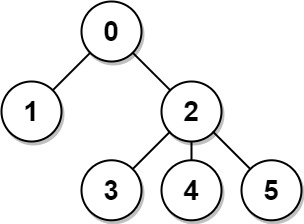

In [193]:
n = 6
edges = [[0,1],[0,2],[2,3],[2,4],[2,5]]

# DFS, time O(n), space O(n)
from collections import defaultdict

def sumOfDistancesInTree(n, edges):
    adj = defaultdict(list)
    for i, j in edges:
        adj[i].append(j)
        adj[j].append(i)
    print(adj)

    ans = 0
    subTree = {}

    def dfs(node, prev, depth):
        total = 1
        nonlocal ans
        ans += depth
        for child in adj[node]:
            if child == prev:
                continue
            print(node, child)
            total += dfs(child, node, depth+1)
        subTree[node] = total
        print(subTree, ans, depth, total)
        return total

    dfs(0, None, 0)
    res = [0] * n
    res[0] = ans
    print(res, subTree)

    def dfs2(node, prev):
        for child in adj[node]:
            if child == prev:
                continue
            res[child] = res[node] - subTree[child] + (n - subTree[child])
            print(res, node, child)
            dfs2(child, node)

    dfs2(0, None)

    return res

sumOfDistancesInTree(n, edges)

defaultdict(<class 'list'>, {0: [1, 2], 1: [0], 2: [0, 3, 4, 5], 3: [2], 4: [2], 5: [2]})
0 1
{1: 1} 1 1 1
0 2
2 3
{1: 1, 3: 1} 4 2 1
2 4
{1: 1, 3: 1, 4: 1} 6 2 1
2 5
{1: 1, 3: 1, 4: 1, 5: 1} 8 2 1
{1: 1, 3: 1, 4: 1, 5: 1, 2: 4} 8 1 4
{1: 1, 3: 1, 4: 1, 5: 1, 2: 4, 0: 6} 8 0 6
[8, 0, 0, 0, 0, 0] {1: 1, 3: 1, 4: 1, 5: 1, 2: 4, 0: 6}
[8, 12, 0, 0, 0, 0] 0 1
[8, 12, 6, 0, 0, 0] 0 2
[8, 12, 6, 10, 0, 0] 2 3
[8, 12, 6, 10, 10, 0] 2 4
[8, 12, 6, 10, 10, 10] 2 5


[8, 12, 6, 10, 10, 10]

### 797. All Paths From Source to Target
Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1 and return them in any order.

The graph is given as follows: graph[i] is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node graph[i][j]).

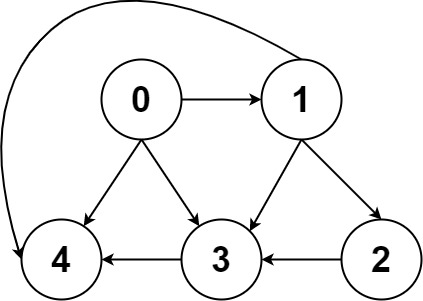

In [1]:
graph = [[4,3,1],[3,2,4],[3],[4],[]]

# DFS
def dfs(graph, start, end, visited, path, paths):
    visited[start] = True
    path.append(start)
    if start == end:
        paths.append(path[:])
    else:
        for i in graph[start]:
            if not visited[i]:
                dfs(graph, i, end, visited, path, paths)
    # reset the searching path
    path.pop()
    visited[start] = False
    
n = len(graph)
visited = [False for _ in range(n)]
paths = []
dfs(graph, 0, n-1, visited, [], paths)
paths

[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]

In [5]:
# DFS with copy
path, paths = [0], []
n = len(graph)
def dfs2(node):
    if node == n-1:
        paths.append(path.copy())
        return
    for i in graph[node]:
        path.append(i)
        dfs2(i)
        path.pop()
dfs2(0)
paths


[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]

In [17]:
# BFS
q = [[0]]
n = len(graph)
res = []
while q:
    tmp = q.pop(0)
    if tmp[-1] == n-1:
        res.append(tmp)
    for i in graph[tmp[-1]]:
        q.append(tmp + [i])
    print("tmp: ", tmp)
    print("q: ",q)
    print("result: ",res)
    print("         ")
res

tmp:  [0]
q:  [[0, 4], [0, 3], [0, 1]]
result:  []
         
tmp:  [0, 4]
q:  [[0, 3], [0, 1]]
result:  [[0, 4]]
         
tmp:  [0, 3]
q:  [[0, 1], [0, 3, 4]]
result:  [[0, 4]]
         
tmp:  [0, 1]
q:  [[0, 3, 4], [0, 1, 3], [0, 1, 2], [0, 1, 4]]
result:  [[0, 4]]
         
tmp:  [0, 3, 4]
q:  [[0, 1, 3], [0, 1, 2], [0, 1, 4]]
result:  [[0, 4], [0, 3, 4]]
         
tmp:  [0, 1, 3]
q:  [[0, 1, 2], [0, 1, 4], [0, 1, 3, 4]]
result:  [[0, 4], [0, 3, 4]]
         
tmp:  [0, 1, 2]
q:  [[0, 1, 4], [0, 1, 3, 4], [0, 1, 2, 3]]
result:  [[0, 4], [0, 3, 4]]
         
tmp:  [0, 1, 4]
q:  [[0, 1, 3, 4], [0, 1, 2, 3]]
result:  [[0, 4], [0, 3, 4], [0, 1, 4]]
         
tmp:  [0, 1, 3, 4]
q:  [[0, 1, 2, 3]]
result:  [[0, 4], [0, 3, 4], [0, 1, 4], [0, 1, 3, 4]]
         
tmp:  [0, 1, 2, 3]
q:  [[0, 1, 2, 3, 4]]
result:  [[0, 4], [0, 3, 4], [0, 1, 4], [0, 1, 3, 4]]
         
tmp:  [0, 1, 2, 3, 4]
q:  []
result:  [[0, 4], [0, 3, 4], [0, 1, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
         


[[0, 4], [0, 3, 4], [0, 1, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]

### 207. Course Schedule
There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. 

You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.

Return true if you can finish all courses. Otherwise, return false.

In [18]:
numCourses = 2
prerequisites = [[1,0],[0,1]]

# detecting if the graph contains a cycle, if there is a cycle, then it is not possible to finish all courses
# DFS
adj = [[] for _ in range(numCourses)]
for i, j in prerequisites:
    adj[i].append(j)

def dfs(node, visited, recStack):
    # mark the current node as visited and add it to the recursion stack
    visited[node] = True
    recStack[node] = True
    # recur for all adjacent nodes, if any adj node is visited and is in the recursion stack, then a cycle is found
    for i in adj[node]:
        if not visited[i]:
            if dfs(i, visited, recStack):
                return True
        elif recStack[i]:
            return True
    # if no cycle is found in the current path, pop out the nodes for the current path from recStack
    recStack[node] = False
    return False
visited = [False] * numCourses
recStack = [False] * numCourses
# search starting from all nodes to see if there is a cycle in the graph
flag = True
for node in range(numCourses):
    if not visited[node]:
        if dfs(node, visited, recStack): # found cycle
            flag = False
            break
print(flag)

False


In [19]:
# DFS method 2, three states
from collections import defaultdict
notChecked, checking, completed = 0, 1, 2
def is_cyclic(course):
    if courseState[course] == checking:
        # a cycle is found
        return True
    elif courseState[course] == completed:
        # current course has been checked and markad as completed
        return False
    # if current course is not checked, firstly update current course as checking
    courseState[course] = checking
    # check preCourse in DFS and detect any cycles
    for preCourse in requirement[course]:
        if is_cyclic(preCourse):
            return True
    # if finished checking current course and no cycle was found, update current course as completed
    courseState[course] = completed
    return False
# each course has a list of its own prerequisites
requirement = defaultdict(list)
for course, preCourse in prerequisites:
    requirement[course].append(preCourse)
# each course has a state of either notChecked, checking, completed; the initial state is notChecked
courseState = [notChecked for _ in range(numCourses)]
flag = True
for courseID in range(numCourses):
    if is_cyclic(courseID):
        flag = False
        break
flag

False

In [34]:
# BFS
numCourses = 6
prerequisites = [[2,1],[4,1],[3,2],[5,4]]

from collections import defaultdict
from collections import deque
todo = {i: set() for i in range(numCourses)}
graph = defaultdict(set)
for i, j in prerequisites:
    # to start course i, need to finish course j
    todo[i].add(j)
    # when finish course j, may start course i
    graph[j].add(i)
print(todo)
print(graph)

queue = deque()
for i, j in todo.items():
    # save all courses without prerequisites in the queue first
    if len(j) == 0:
        queue.append(i)
print(queue)

while queue:
    # the queue stores independent course or finished courses
    n = queue.popleft()
    for i in graph[n]:
        # when finished course n, remove it from  the todo list of course i
        todo[i].remove(n)
        # if todo list i is empty, course i can be started, add it to the queue
        if len(todo[i]) == 0:
            queue.append(i)
    # course n (either independent or completed) has been checked, remove it from the todo list
    todo.pop(n)
# all courses can be completed if the final todo list is empty
todo

{0: set(), 1: set(), 2: {1}, 3: {2}, 4: {1}, 5: {4}}
defaultdict(<class 'set'>, {1: {2, 4}, 2: {3}, 4: {5}})
deque([0, 1])


{}

### 144. Binary Tree Preorder Traversal
Given the root of a binary tree, return the preorder traversal of its nodes' values.
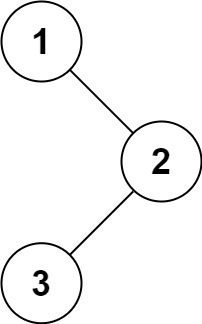

In [ ]:
root = [1, null, 2, 3]

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def preorderTraversal(self, root):
        if not root:
            return []
        def dfs(node):
            if node:
                res.append(node.val)
                dfs(node.left)
                dfs(node.right)
        res = []
        dfs(root)
        return res

In [ ]:
class Solution:
    def preorderTraversal(self, root):
        if not root:
            return []
        stack = [root]
        res = []
        while stack:
            node = stack.pop()
            res.append(node.val)
            if node.left:
                stack.append(node.left)
            if node.right:
                stack.append(node.right)
        return res
                

In [ ]:
class Solution:
    def preorderTraversal(self, root):
        if not root:
            return []
        l = self.preorderTraversal(root.left)
        r = self.preorderTraversal(root.right)
        return [root.val] + l + r

### 210. Course Schedule II
There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return the ordering of courses you should take to finish all courses. If there are many valid answers, return any of them. If it is impossible to finish all courses, return an empty array.

In [ ]:
numCourses = 4
prerequisites = [[1,0],[2,0],[3,1],[3,2]]

In [73]:
# BFS topological sorting
# 1. identify a node witho no incoming egdes
# 2. add that node to the ordering
# 3. remove it from the graph
# 4. repeat; if len(ordering) != number of nodes, there is a cycle in the graph

from collections import defaultdict
from collections import deque

def findOrder(numCourses, prerequisites):
    # create a prerequisites dict containing courses that need to be taken before we can visit the key
    preq = {i:set() for i in range(numCourses)}
    # create a graph for adjacent and traversing
    graph = defaultdict(set)
    for i, j in prerequisites:
        # graph stores nodes and neighbors (directed)
        graph[j].add(i)
        # preqs store requirements for each course
        preq[i].add(j)
    print(graph)
    print(preq)

    # q stores courses without prerequisites requirement (identify nodes without incoming edges)
    q = deque([])
    for k, v in preq.items():
        if len(v) == 0:
            q.append(k)
    # store courses can be taken (no prerequisites or all prerequisites satisfied)
    taken = []
    while q:
        course = q.popleft()
        taken.append(course)
        # if all courses are taken, searching finished
        if len(taken) == numCourses:
            return taken
        for cor in graph[course]:
            # remove the taken course "course" from the prerequisites of course "cor"
            preq[cor].remove(course)
            # if course "cor" has no prerequisites left, add it to q
            if not preq[cor]:
                q.append(cor)
    return []
findOrder(numCourses, prerequisites)

defaultdict(<class 'set'>, {0: {1, 2}, 1: {3}, 2: {3}})
{0: set(), 1: {0}, 2: {0}, 3: {1, 2}}


[0, 1, 2, 3]

In [87]:
# DFS
class Solution:
    
    def findOrder(self, numCourses, prerequisites):
        graph = defaultdict(list)
        self.stack = []
        self.visited = {}

        for i, j in prerequisites:
            graph[j].append(i)

        for i in range(numCourses):
            if i not in self.visited:
                self.dfs(graph, i)

        if len(self.stack) == numCourses:
            return list(reversed(self.stack))
        else:
            return []
        
    def dfs(self, graph, i):
        # visited[i] will be true for every i that is still in call stack, to catch a cycle if any
            self.visited[i] = True
            for j in graph[i]:
                if j not in self.visited:
                    self.dfs(graph, j)
                # indicating that there is cycle in the graph,
                # returning here will result in len(stack) being < 0 which will return []
                # as topological sort is not for cyclic graph
                elif self.visited[j]:
                    return
            # before returning from dfs, add i to stack and make visited[i] False (reset/backtrack),
            # as i not in call stack anymore
            self.stack.append(i)
            self.visited[i] = False
    
C = Solution()
C.findOrder(numCourses, prerequisites)

[0, 2, 1, 3]

### 100. Same Tree
Given the roots of two binary trees p and q, write a function to check if they are the same or not.

Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.
<img src="https://assets.leetcode.com/uploads/2020/12/20/ex1.jpg" width="400">

In [ ]:
# iterative DFS
def isSameTree(p, q):
    if not q and not p:
        return True
    elif not q or not p:
        return False
    stack = [(q, p)]
    while stack:
        nodeq, nodep = stack.pop()
        if not nodep and not nodeq:
            continue
        elif not nodep or not nodeq or nodep.val != nodeq.val:
            return False
        stack.append((nodep,left, nodeq.left))
        stack.append((nodep.right, nodeq.right))
    return True

In [ ]:
# recursive DFS
def isSameTree(p, q):
    if not q and not p:
        return True
    elif not q or not p or q.val != p.val:
        return False
    return isSameTree(p.left, q.left) and isSameTree(p.right, q.right)

In [ ]:
# iterative BFS
def isSameTree(p, q):
    from collections import deque
    queue = deque([p, q])
    while queue:
        p, q = queue.popleft()
        if not p and not q:
            continue
        elif not p or not q or p.val != q.val:
            return False
        queue.extend([(p.left, q.left), (p.right, q.right)])
    return True

### 103. Binary Tree Zigzag Level Order Traversal
Given the root of a binary tree, return the zigzag level order traversal of its nodes' values. (i.e., from left to right, then right to left for the next level and alternate between).
<img src="https://assets.leetcode.com/uploads/2021/02/19/tree1.jpg" width="200">

In [ ]:
# iterative BFS
def zigzagLevelOrder(root):
    if not root:
        return []
    curLevel, nextLevel, res = [root], [], []
    level = 1
    tmp = []
    while curLevel:
        node = curLevel.pop()
        tmp.append(node.val)
        if level%2:
            if node.left:
                nextLevel.append(node.left)
            if node.right:
                nextLevel.append(node.right)
        else:
            if node.right:
                nextLevel.append(node.right)
            if node.left:
                nextLevel.append(node.left)
        if not curLevel:
            res.append(tmp)
            tmp = []
            level += 1
            curLevel, nextLevel = nextLevel, []
    return res

In [ ]:
# iterative method 2
def zigzagLevelOrder(root):
    if not root:
        return []
    stack, res = [root], []
    reverse = True
    while stack:
        tmp = []
        res.append([node.val for node in (stack if reverse else stack[::-1])])
        reverse = not reverse
        while stack:
            node = stack.pop(0)
            if node.left: tmp.append(node.left)
            if node.right: tmp.append(node.right)
        stack = tmp
    return res

In [ ]:
# iterative method 3
def zigzagLevelOrder(root):
    if not root:
        return []
    from collections import deque
    queue = deque([root])
    res = []
    reverse = False
    while queue:
        n = len(queue)
        tmp = []
        for _ in range(n):
            node = queue.popleft()
            tmp.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        if reverse:
            res.append(tmp[::-1])
        else:
            res.append(tmp)
        reverse = not reverse
    return res

In [ ]:
# recursive
def zigzagLevelOrder(root):
    if not root:
        return []
    res = []
    def dfs(node, height):
        if node:
            if len(res) <= height:
                res.append([])
            res[height].append(node.val)
            dfs(node.left, height + 1)
            dfs(node.right, height + 1)
    dfs(root, 0)
    return [res[i] if i%2==0 else res[i][::-1] for i in range(len(res))]

### 1443. Minimum Time to Collect All Apples in a Tree
Given an undirected tree consisting of n vertices numbered from 0 to n-1, which has some apples in their vertices. You spend 1 second to walk over one edge of the tree. Return the minimum time in seconds you have to spend to collect all apples in the tree, starting at vertex 0 and coming back to this vertex.

The edges of the undirected tree are given in the array edges, where edges[i] = [ai, bi] means that exists an edge connecting the vertices ai and bi. Additionally, there is a boolean array hasApple, where hasApple[i] = true means that vertex i has an apple; otherwise, it does not have any apple.

<img src="https://assets.leetcode.com/uploads/2020/04/23/min_time_collect_apple_1.png" width="200">

In [103]:
n = 7
edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]]
false, true = False, True
hasApple = [false,false,true,false,false,true,false]

# DFS

from collections import defaultdict
adj = defaultdict(list)
for i, j in edges:
    adj[i].append(j)
    adj[j].append(i)

visited = set()

def dfs(node):
    if node in visited:
        return 0
    visited.add(node)
    t = 0
    for v in adj[node]:
        t += dfs(v)
    if t > 0:
        return t + 2
    return 2 if hasApple[node] else 0

max(dfs(0) - 2, 0)

6

### 1519. Number of Nodes in the Sub-Tree With the Same Label
You are given a tree (i.e. a connected, undirected graph that has no cycles) consisting of n nodes numbered from 0 to n - 1 and exactly n - 1 edges. The root of the tree is the node 0, and each node of the tree has a label which is a lower-case character given in the string labels (i.e. The node with the number i has the label labels[i]).

The edges array is given on the form edges[i] = [ai, bi], which means there is an edge between nodes ai and bi in the tree.

Return an array of size n where ans[i] is the number of nodes in the subtree of the ith node which have the same label as node i.

A subtree of a tree T is the tree consisting of a node in T and all of its descendant nodes.

<img src="https://assets.leetcode.com/uploads/2020/07/01/q3e1.jpg" width="256">

In [173]:
n = 7
edges = [[0,1],[0,2],[1,4],[1,5],[2,3],[2,6]]
labels = "abaedcd"

# DFS
from collections import defaultdict
from collections import Counter
adj = defaultdict(list)
for i, j in edges:
    adj[i].append(j)
    adj[j].append(i)
    
visited = set()
ans = [0 for _ in range(n)]

def dfs(node):
    cnt = Counter()
    if node not in visited:
        visited.add(node)
        cnt[labels[node]] += 1
        for v in adj[node]:
            cnt += dfs(v)
        ans[node] = cnt[labels[node]]
        print(node, cnt)
    return cnt  
dfs(0)
ans

4 Counter({'d': 1})
5 Counter({'c': 1})
1 Counter({'b': 1, 'd': 1, 'c': 1})
3 Counter({'e': 1})
6 Counter({'d': 1})
2 Counter({'a': 1, 'e': 1, 'd': 1})
0 Counter({'a': 2, 'd': 2, 'b': 1, 'c': 1, 'e': 1})


[2, 1, 1, 1, 1, 1, 1]

In [167]:
ans = [0 for _ in range(n)]
def dfs2(node, parent):
    cnt = Counter(labels[node])
    for v in adj[node]:
        if v != parent:
            cnt += dfs2(v, node)
    print(cnt)
    ans[node] = cnt[labels[node]]
    return cnt
dfs2(0, None)
ans

Counter({'d': 1})
Counter({'c': 1})
Counter({'b': 1, 'd': 1, 'c': 1})
Counter({'e': 1})
Counter({'d': 1})
Counter({'a': 1, 'e': 1, 'd': 1})
Counter({'a': 2, 'd': 2, 'b': 1, 'c': 1, 'e': 1})


[2, 1, 1, 1, 1, 1, 1]

### Longest Path With Different Adjacent Characters
You are given a tree (i.e. a connected, undirected graph that has no cycles) rooted at node 0 consisting of n nodes numbered from 0 to n - 1. The tree is represented by a 0-indexed array parent of size n, where parent[i] is the parent of node i. Since node 0 is the root, parent[0] == -1.

You are also given a string s of length n, where s[i] is the character assigned to node i.

Return the length of the longest path in the tree such that no pair of adjacent nodes on the path have the same character assigned to them.
<img src="https://assets.leetcode.com/uploads/2022/03/25/testingdrawio.png" width="160">

In [213]:
parent = [-1,0,0,1,1,2]
s = "abacbe"
# DFS
import collections
# create a map of parent:[children]
graph = collections.defaultdict(list)
for i, p in enumerate(parent):
    if p == -1:
        continue
    graph[p].append(i)
print(graph)

res = 1

def dfs(node):
    global res
    # if the current node is not a parent node, return depth of itself, i.e., 1
    if node not in graph:
        return 1
    depth_cur = 1 # current maxmium depth
    # traversal children of the current parent node
    for v in graph[node]:
        # dfs depths of children nodes
        depth_child = dfs(v) # maximum children depth
        # update depths when a different children char is found
        if s[v] != s[node]:
            print("before",depth_cur, depth_child, res)
            res = max(res, depth_cur + depth_child)
            # update maximum current depth by finding the maximum children depth
            depth_cur = max(depth_cur, depth_child + 1)
        print("update -> ",depth_cur, depth_child, res)
    return depth_cur
dfs(0)
res

defaultdict(<class 'list'>, {0: [1, 2], 1: [3, 4], 2: [5]})
before 1 1 1
update ->  2 1 2
update ->  2 1 2
before 1 2 2
update ->  3 2 3
before 1 1 3
update ->  2 1 3
update ->  3 2 3


3

In [216]:
dit = {}
for i in range(len(parent)):
    if parent[i] in dit:
        dit[parent[i]].append(i)
    else:
        dit[parent[i]] = [i]
ans = 1

def dfs(node):
    global ans
    if node not in dit:
        return 1
    largest = 0 # largest path length among all children
    second_largest = 0 # second largest path lengths among all children
    for v in dit[node]:
        cur = dfs(v)
        if s[v] != s[node]: # pick child path if child and parent both have different chars
            if cur > largest:
                second_largest = largest
                largest = cur
            elif cur > second_largest:
                second_largest = cur
    ans = max(ans, largest + second_largest + 1) # largest path including parent with at most two children
    return largest + 1 # return largest path end at parent
dfs(0)
ans

3

### 1061. Lexicographically Smallest Equivalent String
You are given two strings of the same length s1 and s2 and a string baseStr.

We say s1[i] and s2[i] are equivalent characters.

For example, if s1 = "abc" and s2 = "cde", then we have 'a' == 'c', 'b' == 'd', and 'c' == 'e'.
Equivalent characters follow the usual rules of any equivalence relation:

Reflexivity: 'a' == 'a'. <br>
Symmetry: 'a' == 'b' implies 'b' == 'a'. <br>
Transitivity: 'a' == 'b' and 'b' == 'c' implies 'a' == 'c'. <br>
For example, given the equivalency information from s1 = "abc" and s2 = "cde", "acd" and "aab" are equivalent strings of baseStr = "eed", and "aab" is the lexicographically smallest equivalent string of baseStr.

Return the lexicographically smallest equivalent string of baseStr by using the equivalency information from s1 and s2.

In [217]:
s1 = "parker"
s2 = "morris"
baseStr = "parser"

In [221]:
# model equalities as edges of a graph
# group each connected component of the graph and assign each node of this component to the node 
# with the lowest lexicograohically character

# union-find

def find(c): # lowest lexicograohically character 
    i = ord(c) - ord("a")
    while root[i] != i:
        i = root[i]
    return i
root = list(range(26))
for c1, c2 in zip(s1, s2):
    r1 = find(c1)
    r2 = find(c2)
    if r1 > r2:
        r1, r2 = r2, r1 
    root[r2] = r1
    print(root)
ans = "".join(chr(ord("a") + find(c)) for c in baseStr)
print(ans)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 12, 16, 10, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 4, 9, 10, 11, 12, 13, 0, 12, 16, 10, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 4, 9, 10, 11, 12, 13, 0, 12, 16, 10, 10, 19, 20, 21, 22, 23, 24, 25]
makkek


In [233]:
# method 2
char_group = {} # e.g., char_group = {0:['a','d'], 1:['e','f']}
idx = 0
char_map = {chr(ord("a") + i):-1 for i in range(26)} # map of grouping charactors with initial group labeled -1
# grouping charactors
for i in range(len(s1)):
    if s1[i] == s2[i]: # same char, do nothing
        continue
    if char_map[s1[i]] == -1 and char_map[s2[i]] == -1: # first time seen the two char to a new group
        char_map[s1[i]] = char_map[s2[i]] = idx
        char_group[idx] = [s1[i], s2[i]]
        idx += 1
    elif char_map[s1[i]] == -1: # if only one of char already updated in the maps
        char_map[s1[i]] = char_map[s2[i]]
        char_group[char_map[s2[i]]].append(s1[i])
    elif char_map[s2[i]] == -1:
        char_map[s2[i]] = char_map[s1[i]]
        char_group[char_map[s1[i]]].append(s2[i])
    elif char_map[s1[i]] != char_map[s2[i]]:
        for c in char_group[char_map[s2[i]]]:
            char_map[c] = char_map[s1[i]]
            char_group[char_map[s1[i]]].append(c)
print(char_map)
print(char_group)
# sorting char_group
for k in char_group.keys():
    char_group[k].sort()
print(char_group)
ans = ""
for c in baseStr:
    ans += char_group[char_map[c]][0]
ans

{'a': 1, 'b': -1, 'c': -1, 'd': -1, 'e': 3, 'f': -1, 'g': -1, 'h': -1, 'i': 3, 'j': -1, 'k': 2, 'l': -1, 'm': 0, 'n': -1, 'o': 1, 'p': 0, 'q': -1, 'r': 2, 's': 2, 't': -1, 'u': -1, 'v': -1, 'w': -1, 'x': -1, 'y': -1, 'z': -1}
{0: ['p', 'm'], 1: ['a', 'o'], 2: ['k', 'r', 's'], 3: ['e', 'i']}
{0: ['m', 'p'], 1: ['a', 'o'], 2: ['k', 'r', 's'], 3: ['e', 'i']}


'makkek'

In [250]:
# DFS
from collections import defaultdict
equiv = defaultdict(set) # define graph edges
smallest = defaultdict(str) # map of smallest equivalent

for c1, c2 in zip(s1, s2):
    if c1 == c2:
        continue
    equiv[c1].add(c2)
    equiv[c2].add(c1)
print(equiv)

def setMinChar(curr, minCh):
    if curr in smallest:
        return
    smallest[curr] = minCh
    # dfs smallest value for all char in equiv[curr]
    for eq in equiv[curr]:
        setMinChar(eq, minCh)

for c in [chr(ord("a") + i) for i in range(26)]:
    if c in equiv:
        if c in smallest: continue
        setMinChar(c, c)

print(smallest)
ans = "".join(smallest[c] if c in smallest else c for c in baseStr)
ans

defaultdict(<class 'set'>, {'p': {'m'}, 'm': {'p'}, 'a': {'o'}, 'o': {'a'}, 'k': {'r'}, 'r': {'s', 'k'}, 'e': {'i'}, 'i': {'e'}, 's': {'r'}})
defaultdict(<class 'str'>, {'a': 'a', 'o': 'a', 'e': 'e', 'i': 'e', 'k': 'k', 'r': 'k', 's': 'k', 'm': 'm', 'p': 'm'})
defaultdict(<class 'str'>, {'a': 'a', 'o': 'a', 'e': 'e', 'i': 'e', 'k': 'k', 'r': 'k', 's': 'k', 'm': 'm', 'p': 'm'})


'makkek'

### 2421. Number of Good Paths
There is a tree (i.e. a connected, undirected graph with no cycles) consisting of n nodes numbered from 0 to n - 1 and exactly n - 1 edges.

You are given a 0-indexed integer array vals of length n where vals[i] denotes the value of the ith node. You are also given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

A good path is a simple path that satisfies the following conditions:

The starting node and the ending node have the same value.
All nodes between the starting node and the ending node have values less than or equal to the starting node (i.e. the starting node's value should be the maximum value along the path).
Return the number of distinct good paths.

Note that a path and its reverse are counted as the same path. For example, 0 -> 1 is considered to be the same as 1 -> 0. A single node is also considered as a valid path.

<img src="https://assets.leetcode.com/uploads/2022/08/04/f9caaac15b383af9115c5586779dec5.png" width="256">

In [322]:
vals = [1,3,2,1,3]
edges = [[0,1],[0,2],[2,3],[2,4]]

In [319]:
# union find, time complexity O(nlogn)
from collections import defaultdict

ans = 0
f = list(range(len(vals)))

dic = defaultdict(list) # map of nodes with the same value
adjmap = [[] for _ in range(len(vals))] # graph only storing adjacent nodes with equal or smaller values

# union-find help function
def find(u):
    if f[u] == u:
        return u
    f[u] = find(f[u])
    return f[u]

def merge(u, v):
    fu, fv = find(u), find(v)
    if fu != fv:
        f[fu] = fv

for i, val in enumerate(vals):
    dic[val].append(i)
    
for u, v in edges:
    uVal, vVal = vals[u], vals[v]
    if uVal >= vVal:
        adjmap[u].append(v)
    else:
        adjmap[v].append(u)
        
print(dic)
print(adjmap)

keys = sorted(dic.keys())
print(keys)

for key in keys:
    arr = dic[key]
    for u in arr:
        for v in adjmap[u]:  
            merge(u, v)
            print((u, v), f)
    groups = defaultdict(list)
    for u in arr:
        groups[find(u)].append(u)
    for root, node in groups.items():
        ans += (len(node) * (len(node)+1)) >> 1
    print(ans, groups)
    print(f)
ans

defaultdict(<class 'list'>, {1: [0, 3], 3: [1, 4], 2: [2]})
[[], [0], [0, 3], [], [2]]
[1, 2, 3]
2 defaultdict(<class 'list'>, {0: [0], 3: [3]})
[0, 1, 2, 3, 4]
(2, 0) [0, 1, 0, 3, 4]
(2, 3) [3, 1, 0, 3, 4]
3 defaultdict(<class 'list'>, {3: [2]})
[3, 1, 3, 3, 4]
(1, 0) [3, 3, 3, 3, 4]
(4, 2) [3, 3, 3, 3, 3]
6 defaultdict(<class 'list'>, {3: [1, 4]})
[3, 3, 3, 3, 3]


6

In [323]:
def get_root(i):
    if i == par[i]:
        return i
    par[i] = get_root(par[i])
    return par[i]
def connect(i, j):
    i, j = get_root(i), get_root(j)
    if i != j:
        if sz[i] < sz[j]:
            i, j = j, i
        par[j] = i
        sz[i] += sz[j] 
    if cur[i] == cur[j]:
        r = cnt[i] * cnt[j]
        cnt[i] += cnt[j]
        return r
    elif cur[i] < cur[j]:
        cur[i], cnt[i] = cur[j], cnt[j]
    return 0

n = ans = len(vals)
sz, cur, cnt, par = [1]*n, vals, [1]*n, list(range(n))
for a, b in sorted(edges, key=lambda p: max(vals[p[0]], vals[p[1]])):
    ans += connect(a, b)
ans

6

### 997. Find the Town Judge
In a town, there are n people labeled from 1 to n. There is a rumor that one of these people is secretly the town judge.

If the town judge exists, then:

The town judge trusts nobody.
Everybody (except for the town judge) trusts the town judge.
There is exactly one person that satisfies properties 1 and 2.
You are given an array trust where trust[i] = [ai, bi] representing that the person labeled ai trusts the person labeled bi.

Return the label of the town judge if the town judge exists and can be identified, or return -1 otherwise.

In [16]:
n = 3
trust = [[1,3],[2,3]]

In [27]:
adj = [[] for _ in range(n)]
for i, j in trust:
    adj[i-1].append(j-1)
#     adj[j-1].append(i-1)
flag = -1
for i in range(n):
    if not adj[i]:
        flag = i+1
        break
if flag != -1:
    for j in range(n):
        if j != i:
            if i not in adj[j]:
                flag = -1
                break
flag

3

In [18]:
adj = [0] * (n+1)
for i, j in trust:
    adj[i] -= 1 # out degree
    adj[j] += 1 # in degree
judge = -1
for i in range(1, len(adj)):
    if adj[i] == n-1:
        judge = i
        break
judge

3

### 909. Snakes and Ladders
You are given an n x n integer matrix board where the cells are labeled from 1 to n^2 in a Boustrophedon style starting from the bottom left of the board (i.e. board[n - 1][0]) and alternating direction each row.

You start on square 1 of the board. In each move, starting from square curr, do the following:

Choose a destination square next with a label in the range [curr + 1, min(curr + 6, n^2)].
This choice simulates the result of a standard 6-sided die roll: i.e., there are always at most 6 destinations, regardless of the size of the board.
If next has a snake or ladder, you must move to the destination of that snake or ladder. Otherwise, you move to next.
The game ends when you reach the square n^2.
A board square on row r and column c has a snake or ladder if board[r][c] != -1. The destination of that snake or ladder is board[r][c]. Squares 1 and n^2 do not have a snake or ladder.

Note that you only take a snake or ladder at most once per move. If the destination to a snake or ladder is the start of another snake or ladder, you do not follow the subsequent snake or ladder.

For example, suppose the board is [[-1,4],[-1,3]], and on the first move, your destination square is 2. You follow the ladder to square 3, but do not follow the subsequent ladder to 4.
Return the least number of moves required to reach the square n^2. If it is not possible to reach the square, return -1.
<img src="https://assets.leetcode.com/uploads/2018/09/23/snakes.png" width="256">

In [102]:
board = [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,35,-1,-1,13,-1],[-1,-1,-1,-1,-1,-1],[-1,15,-1,-1,-1,-1]]

In [104]:
# DFS, time O(n^2), space O(n^2)
def snakesAndLadders(board):
    import collections

    n = len(board)

    def labelToPosition(label):
        r, c = divmod(label-1, n)
        if r % 2 == 0: 
            return n-1-r, c
        else: # turn over for odd row bottom up 
            return n-1-r, n-1-c

    seen = set()

    queue = collections.deque()
    queue.append((1, 0))

    while queue:
        label, step = queue.popleft()
        r, c = labelToPosition(label)
        if board[r][c] != -1:
            label = board[r][c]
        if label == n*n:
            return step
        for x in range(1, 7):
            new_label = label + x
            if new_label <= n*n and new_label not in seen:
                seen.add(new_label)
                queue.append((new_label, step+1))
    return -1

snakesAndLadders(board)

4

In [131]:
board = [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,35,-1,-1,13,-1],[-1,-1,-1,-1,-1,-1],[-1,15,-1,-1,-1,-1]]

# DFS method 2
# convert matrix to 1D array
def snakesAndLadders(board):
    import collections
    from itertools import chain
    board.reverse()
    for i in range(1, len(board), 2): # only revsert odd rows
        board[i].reverse()
    arr = [None] + list(chain(*board)) #  1D array

    n, q, seen = len(arr)-1, collections.deque(), set()
    q.append((1, 0)) # location, step

    while q:
        cur, step = q.popleft()
        if cur == n:
            return step
        for i in range(cur+1, min(cur+7, n+1)):
            # update the next location 
            if arr[i] != -1: # encounter snake or ladder
                nxt = arr[i]
            else:
                nxt = i
            if nxt not in seen:
                seen.add(nxt)
                q.append((nxt, step+1))
    return -1

snakesAndLadders(board)

4

### 2359. Find Closest Node to Given Two Nodes
You are given a directed graph of n nodes numbered from 0 to n - 1, where each node has at most one outgoing edge.

The graph is represented with a given 0-indexed array edges of size n, indicating that there is a directed edge from node i to node edges[i]. If there is no outgoing edge from i, then edges[i] == -1.

You are also given two integers node1 and node2.

Return the index of the node that can be reached from both node1 and node2, such that the maximum between the distance from node1 to that node, and from node2 to that node is minimized. If there are multiple answers, return the node with the smallest index, and if no possible answer exists, return -1.

Note that edges may contain cycles.
<img src='https://assets.leetcode.com/uploads/2022/06/07/graph4drawio-2.png' width='200'>

In [8]:
edges = [2,2,3,-1]
node1, node2 = 0, 1

In [255]:
reach = [[] for _ in range(len(edges))]
visited = [[] for _ in range(len(edges))]

for i in [node1, node2]:
    queue = []
    queue.append(edges[i])
    step = 0
    reach[i].append((i, step))
    visited[i].append(i)
    while queue:
        j = queue.pop()
        if j != -1:
            step += 1
            reach[i].append((j, step))
            visited[i].append(j)
            if edges[j] != -1 and edges[j] not in visited[i]:
                queue.append(edges[j])
print(reach)
minStep = float('inf')
closestNode = -1
for nodeA, stepA in reach[node1]:
    for nodeB, stepB in reach[node2]:
        curStep = max(stepA, stepB)
        if nodeA == nodeB:
            if curStep < minStep:
                minStep, closestNode = curStep, nodeA
            elif curStep == minStep and nodeA < closestNode:
                minStep, closestNode = curStep, nodeA
closestNode

[[(0, 0), (2, 1), (3, 2)], [(1, 0), (2, 1), (3, 2)], [], []]


2

In [20]:
# BFS
def bfs(node):
    visited = set()
    reach = {node: 0}
    dist = 0
    while node != -1:
        visited.add(node)
        reach[node] = dist
        dist += 1
        if edges[node] not in visited:
            node = edges[node]
        else: break
    return reach
reach1 = bfs(node1)
reach2 = bfs(node2)
res, min_dist = None, float('inf') 
print(reach1, reach2)
for node in reach1:
    if node in reach2:
        cur_dist = max(reach1[node], reach2[node])
        if cur_dist < min_dist or (cur_dist == min_dist and node < res):
            res, min_dist = node, cur_dist 
res

{0: 0, 2: 1, 3: 2} {1: 0, 2: 1, 3: 2}


2

In [246]:
# DFS
def dfs(node, dist, edges, dis):
    while node != -1 and dis[node] == -1: # dis[node] == -1 is not visited, avoid cycle
        dis[node] = dist
        dist += 1
        node = edges[node]
res, min_dist, n = -1, float('inf'), len(edges)
dis1, dis2 = [-1]*n, [-1]*n
dfs(node1, 0, edges, dis1)
dfs(node2, 0, edges, dis2)
for i in range(n):
    if min(dis1[i], dis2[i]) >= 0:
        dist = max(dis1[i], dis2[i])
        if dist < min_dist:
            res, min_dist = i, dist
res

2

In [253]:
# DFS
def closestMeetingNode(edges, node1, node2):
    cur = [(node1, 1), (node2, 2)] # (node, group)
    visited = [0] * len(edges)
    ans = float('inf')
    while cur: # level-wise BFS
        new = []
        f = False
        for node, group in cur:
            if visited[node] == 0:
                if edges[node] != -1:
                    new.append((edges[node], group))
                visited[node] = group
            elif visited[node] != group: # node have been reached by both node1 and node2, record the later one to reach here
                f = True
                ans = min(node, ans)
        if f:
            return ans
        cur = new # update level
    return -1

closestMeetingNode(edges, node1, node2)

2

### 787. Cheapest Flights Within K Stops
There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.
<img src="https://assets.leetcode.com/uploads/2022/03/18/cheapest-flights-within-k-stops-3drawio.png" width="180">

In [90]:
flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]]
n, src, dst, k = 4, 0, 3, 1

In [91]:
from collections import defaultdict
dic = defaultdict(lambda: defaultdict(int))
for s,d,p in flights:
    dic[s][d] = p
dic

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(int, {1: 100}),
             1: defaultdict(int, {2: 100, 3: 600}),
             2: defaultdict(int, {0: 100, 3: 200})})

In [92]:
# Dijkstra's algorithm, priority queue, DP, time O(E +Vlog(E)), E: edge, V: vertix; space O(nk)
def findCheapestPrice(flights, n, src, dst, k):
    import heapq
    graph = [[] for _ in range(n)]
    minHeap = [(0, src, k+1)] # current (cost, location, available stops) 
    costs = [[float('inf')] * (k+2) for _ in range(n)] # minimum costs from the src to all n locations
    # e.g., costs[d][m] means the minimum cost from src to d when there is m stops left

    for s, d, p in flights: # start, destination, price
        graph[s].append((d, p))

    while minHeap:
        cost, location, stops = heapq.heappop(minHeap)
        if location == dst: # if reached destination
            print(costs)
            return cost
        if stops > 0: # search from current location
            for d, p in graph[location]:
                new_cost = cost + p
                if new_cost < costs[d][stops-1]:
                    costs[d][stops-1] = new_cost
                    heapq.heappush(minHeap, (new_cost, d, stops-1))
    return -1

findCheapestPrice(flights, n, src, dst, k)

[[inf, inf, inf], [inf, 100, inf], [200, inf, inf], [700, inf, inf]]


700

In [93]:
# Bellman-Ford algorithm + DP, time O(VE), space O(2n)
def findCheapestPrice(flights, n, src, dst, k):
    costs = [float('inf') for _ in range(n)] # table of min cost from src to location i
    costs[src] = 0
    for s, d, p in flights:
        if s == src:
            costs[d] = p
    # updating costs
    for i in range(k):
        cur_costs = [*costs]
        for s, d, p in flights:
            cur_costs[d] = min(cur_costs[d], costs[s]+p)
            print(cur_costs, costs)
        costs = cur_costs        
    if costs[dst] == float('inf'):
        return -1
    return costs[dst]

findCheapestPrice(flights, n, src, dst, k)

[0, 100, inf, inf] [0, 100, inf, inf]
[0, 100, 200, inf] [0, 100, inf, inf]
[0, 100, 200, inf] [0, 100, inf, inf]
[0, 100, 200, 700] [0, 100, inf, inf]
[0, 100, 200, 700] [0, 100, inf, inf]


700

In [94]:
# Shortest path faster algorithm, worst time complexity O(VE)
def findCheapestPrice(flights, n, src, dst, k):
    from collections import defaultdict
    from collections import deque
    adj = defaultdict(list)
    for s, d, p in flights:
        adj[s].append([d, p])
    # modified SPFA
    costs = {src: 0}
    queue = deque()
    queue.append((src, 0, 0))
    while queue:
        loc, cur_cost, stops = queue.popleft()
        for d, p in adj[loc]:
            if d not in costs or (p + cur_cost < costs[d]):
                costs[d] = p + cur_cost
                if stops < k:
                    queue.append((d, costs[d], stops+1))
    return costs[dst] if dst in costs else -1
findCheapestPrice(flights, n, src, dst, k)

700

### 472. Concatenated Words
Given an array of strings words (without duplicates), return all the concatenated words in the given list of words.

A concatenated word is defined as a string that is comprised entirely of at least two shorter words in the given array.

In [95]:
words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]

In [97]:
# Trie & DFS, time O(n), space O(n)
from collections import defaultdict
# create a trie data structure for all given words
ddic = lambda: defaultdict(ddic)
trie = ddic()
for word in words:
    cur = trie
    for char in word:
        cur = cur[char]
    cur['end'] = True
def dfs(word, start):
    # if the current prefix is in the trie
    # DFS to check whether the slice of the word starting after the prefix is a concatenated word
    cur = trie
    for i in range(start, len(word)):
        char = word[i]
        if char not in cur:
            return False
        cur = cur[char]
        if 'end' in cur:
            if i+1 == len(word):
                return start != 0 # distinguish simple words from concatenated words
            if dfs(word, i+1):
                return True
    return False
[word for word in words if dfs(word, 0)]

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [98]:
# Trie + DFS method2 (another way to construct trie data structure)
# step1: insert all the words into the trie
# step2: DFS each word to find concatenated words  
from collections import defaultdict
class TrieNode:
    def __init__(self):
        self.child = defaultdict(TrieNode)
        self.isEnd = False
class Trie:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, word):
        marker = self.root
        for ch in word:
            marker = marker.child[ch]
        marker.isEnd = True

def dfs(word, start, root, count):
    n, marker = len(word), root
    for i in range(start, n):
        marker = marker.child[word[i]]
        if marker.isEnd:
            if i == n-1:
                return count >= 1 # distinguish simple words from concatenate words
            if dfs(word, i+1, root, count+1):
                return True
    return False
trie = Trie()
for word in words:
    trie.insert(word)
[word for word in words if dfs(word, 0, trie.root, 0)]

['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

In [99]:
# Pure DFS (prefix + suffix)
d = set(words)
print(d)
def dfs(word):
    for i in range(1, len(word)):
        prefix, suffix = word[:i], word[i:]
        if prefix in d and suffix in d:
            return True
        if prefix and dfs(suffix):
            return True
    return False
[word for word in words if dfs(word)]

{'cat', 'dogcatsdog', 'cats', 'dog', 'ratcatdogcat', 'catsdogcats', 'rat', 'hippopotamuses'}


['catsdogcats', 'dogcatsdog', 'ratcatdogcat']

### 1129. Shortest Path with Alternating Colors
You are given an integer n, the number of nodes in a directed graph where the nodes are labeled from 0 to n - 1. Each edge is red or blue in this graph, and there could be self-edges and parallel edges.

You are given two arrays redEdges and blueEdges where:

- redEdges[i] = [ai, bi] indicates that there is a directed red edge from node ai to node bi in the graph, and
- blueEdges[j] = [uj, vj] indicates that there is a directed blue edge from node uj to node vj in the graph.

Return an array answer of length n, where each answer[x] is the length of the shortest path from node 0 to node x such that the edge colors alternate along the path, or -1 if such a path does not exist.

In [1]:
n = 3
redEdges = [[0,1]]
blueEdges =  [[2,1]]

In [12]:
# BFS, time O(n), space O(n)
def shortestAlternatingPaths(n, redEdges, blueEdges):
    from collections import deque
    res = [-1 for _ in range(n)]
    adj = [[] for _ in range(n)]
    for i, j in redEdges:
        adj[i].append((j, 1)) # mark red edges as '1'
    for i, j in blueEdges:
        adj[i].append((j, 2)) # mark blue edges as '2'
    q = deque([(0, 0)])
    step = 0
    
    print(adj)
    
    while q:
        for _ in range(len(q)):
            curNode, prevColor = q.popleft()
            if res[curNode] == -1: # if the current node is visited/result not updated
                res[curNode] = step # update the shortest distance found so far
            for i, (node, edgeColor) in enumerate(adj[curNode]):
                # check if the adj node is not visited and the edge color is different
                if node == -1 or edgeColor == prevColor: 
                    continue
                q.append((node, edgeColor)) 
                adj[curNode][i] = (-1, edgeColor) # mark node as visited
                print(adj, curNode, i)
        step += 1 # increase distance in each BF-search
    return res
shortestAlternatingPaths(n, redEdges, blueEdges)

[[(1, 1)], [], [(1, 2)]]
[[(-1, 1)], [], [(1, 2)]] 0 0


[0, 1, -1]

### 104. Maximum Depth of Binary Tree
Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [5]:
root = [3,9,20,null,null,15,7]

In [ ]:
# BFS
def maxDepth(root):
    if not root:
        return 0
    from collections import deque
    q = deque()
    q.append(root)
    res = 0
    while q:
        res += 1
        for _ in range(len(q)):
            node = q.popleft()
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)
    return res

In [ ]:
# BFS 2
def maxDepth(root):
    if root:
        level = [root]
    else:
        level = []
    res = 0
    while level:
        res += 1
        queue = []
        for node in level:
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        level = queue
    return res

In [ ]:
# DFS
def maxDepth(root):
    res = 0
    def dfs(node, curDepth):
        nonlocal res
        res = max(res, curDepth)
        if node.left:
            dfs(node.left, curDepth+1)
        if node.right:
            dfs(node.right, curDepth+1)
    dfs(root, 0)
    return res

In [6]:
# DFS 2
class Solution:
    def maxDepth(self, root):
        if not root:
            return 0
        return max(self.maxDepth(root.left), self.maxDepth(root.right)) + 1

In [8]:
# DFS 3
def maxDepth(root):
    def dfs(node, depth):
        if not node:
            return depth
        return max(dfs(node.left, depth+1), dfs(node.right, depth+1))
    return dfs(root, 0)

In [ ]:
# DFS iterative
def maxDepth(root):
    if not root:
        return 0
    stack, depth = [(root, 1)], 0
    while stack:
        cur, curDepth = stack.pop()
        if cur:
            depth = max(depth, curDepth)
            if cur.left:
                stack.append((cur.left, curDepth+1))
            if cur.right:
                stack.append((cur.right, curDepth+1))
    return depth

### 783. Minimum Distance Between BST Nodes
Given the root of a Binary Search Tree (BST), return the minimum difference between the values of any two different nodes in the tree.

In [ ]:
root = [1,0,48,null,null,12,49]

In [10]:
# BFS + sorting, time O(n), space O(n)
def minDiffInBST(root):
    from collections import deque
    res = []
    q = deque()
    q.append(root)
    while q:
        node = q.popleft()
        res.append(node.val)
        if node.left:
            q.append(node.left)
        if node.right:
            q.append(node.right)
    res.sort()
    ans = float('inf')
    for i in range(len(res) - 1):
        ans = min(ans, res[i+1] - res[i])
    return ans

[2, 3, 4]

In [ ]:
# DFS + sorting
def minDiffInBST(root):
    res = []
    def dfs(node):
        if node:
            res.append(node.val)
        if node.left:
            dfs(node.left)
        if node.right:
            dfs(node.right)
    dfs(root)
    res.sort()
    ans = float('inf')
    for i in range(len(res) - 1):
        ans = min(ans, res[i+1]-res[i])
    return ans

In [ ]:
# Inorder traversal, note that the given root is already sorted with inorder
# inorder:
#      4
#    /   \
#   2     6
#  / \   / \
# 1   3 5  7
class Solution:
    def __init__(self):
        self.res = []
        
    def inorder(self, root):
        if not root:
            return
        self.inorder(root.left)
        self.res(root.val)
        self.inorder(root.right)
        
    def minDiffInBST(root):
        if not root:
            return 0
        self.inorder(root)
        ans = float('inf')
        for i in range(1, len(self.res)):
            ans = min(ans, self.res[i] - self.res[i-1])
        return ans

In [ ]:
# Inorder method 2
class Solution:
    def minDiffInBST(root):
        self.ans = float('inf')
        self.prev = None
        self.inorder(root)
        return self.ans
    
    def inorder(self, node):
        if node is None:
            return
        self.inorder(node.left)
        if self.prev is not None:
            self.ans = min(self.ans, root.val - self.prev)
        self.prev = root.val # update previous node val
        self.inorder(root.right)

In [ ]:
# Iterative inorder
def minDiffInBST(root):
    stack = []
    prev = None
    ans = float('inf')
    while stack or root:
        while root:
            stack.append(root)
            root = root.left
        root = stack.pop()
        ans = min(ans, root.val-prev.val) if prev else ans
        prev = root
        root = root.right
    return ans

### 226. Invert Binary Tree
Given the root of a binary tree, invert the tree, and return its root.

Example 1:

<img src='https://assets.leetcode.com/uploads/2021/03/14/invert1-tree.jpg' width=400>

Input: root = [4,2,7,1,3,6,9] <br>
Output: [4,7,2,9,6,3,1] 

In [ ]:
# recursive 
def invertTree(root):
    if not root:
        return
    root.left, root.right = invertTree(root.right), invertTree(root.left)
    return root

In [ ]:
# iterative
def invertTree(root):
    if not root:
        return
    level = [root]
    while level:
        node = level.pop()
        node.left, node.right = node.right, node.left
        if node.left:
            level.append(node.left)
        if node.right:
            level.append(node.right)
    return root

### 2477. Minimum Fuel Cost to Report to the Capital
There is a tree (i.e., a connected, undirected graph with no cycles) structure country network consisting of n cities numbered from 0 to n - 1 and exactly n - 1 roads. The capital city is city 0. You are given a 2D integer array roads where roads[i] = [ai, bi] denotes that there exists a bidirectional road connecting cities ai and bi.

There is a meeting for the representatives of each city. The meeting is in the capital city.

There is a car in each city. You are given an integer seats that indicates the number of seats in each car.

A representative can use the car in their city to travel or change the car and ride with another representative. The cost of traveling between two cities is one liter of fuel.

Return the minimum number of liters of fuel to reach the capital city.

Example:
<img src='https://assets.leetcode.com/uploads/2022/11/16/2.png' width=200>
Input: roads = [[3,1],[3,2],[1,0],[0,4],[0,5],[4,6]], seats = 2
Output: 7<br>
Explanation: 
- Representative2 goes directly to city 3 with 1 liter of fuel.
- Representative2 and representative3 go together to city 1 with 1 liter of fuel.
- Representative2 and representative3 go together to the capital with 1 liter of fuel.
- Representative1 goes directly to the capital with 1 liter of fuel.
- Representative5 goes directly to the capital with 1 liter of fuel.
- Representative6 goes directly to city 4 with 1 liter of fuel.
- Representative4 and representative6 go together to the capital with 1 liter of fuel.

It costs 7 liters of fuel at minimum. <br>
It can be proven that 7 is the minimum number of liters of fuel needed.

In [24]:
roads = [[3,1],[3,2],[1,0],[0,4],[0,5],[4,6]]
seats = 2

In [17]:
# DFS time O(n), space O(n)
class Solution:
    def minimumFuelCost(self, roads, seats):
        from collections import defaultdict
        import math
        
        adj = defaultdict(list)
        for i, j in roads:
            adj[i].append(j)
            adj[j].append(i)
            
        self.ans = 0
        
        def dfs(cur, prev, n=1):
            for node in adj[cur]:
                if node == prev: # if seen the curent node
                    continue
                n += dfs(node, cur)
            # assemble passengers at each parent node, 
            # divided by seats to determine how many cars needed to get to the next parent node
            self.ans += int(math.ceil(n/seats)) if cur else 0 
            return n
        
        dfs(0, 0)
        return self.ans

res = Solution()
res.minimumFuelCost(roads, seats)

7

In [28]:
# BFS, time O(n), space O(n)
def minimumFuelCost(roads, seats):
    n = 0
    from collections import defaultdict, deque
    import math

    adj = defaultdict(set)
    for i, j in roads:
        adj[i].add(j)
        adj[j].add(i)
        n = max(n, i, j)
    
    leaves = deque()
    p = [1] * (n+1) # every city has a rep, n+1 is the number of cities
    for i in range(n+1):
        # len(adj[i]) == 1 denotes there is only one connected node, it's an end node
        if i and len(adj[i]) == 1: leaves.append(i)
            
    while leaves:
        print(leaves)
        for i in range(len(leaves)):
            leaf = leaves.popleft()
            neighbor = adj[leaf].pop()
            p[neighbor] += p[leaf]
            adj[neighbor].remove(leaf) # trim off the end nodes
            # after trimming, if the neighbor node only connected to its parent node, its a new end node
            if neighbor and len(adj[neighbor]) == 1: leaves.append(neighbor)
    print(p)
    return sum(math.ceil(p[i]/seats) for i in range(1, n+1))
    
minimumFuelCost(roads, seats)

deque([2, 5, 6])
deque([3, 4])
deque([1])
[7, 3, 1, 2, 2, 1, 1]


7

### 427. Construct Quad Tree
Given a n * n matrix grid of 0's and 1's only. We want to represent the grid with a Quad-Tree.

Return the root of the Quad-Tree representing the grid.

Notice that you can assign the value of a node to True or False when isLeaf is False, and both are accepted in the answer.

A Quad-Tree is a tree data structure in which each internal node has exactly four children. Besides, each node has two attributes:

- val: True if the node represents a grid of 1's or False if the node represents a grid of 0's.
- isLeaf: True if the node is leaf node on the tree or False if the node has the four children.

In [29]:
class Node:
    def __init__(self, val, isLeaf, topLeft, topRight, bottomLeft, bottomRight):
        self.val = val
        self.isLeaf = isLeaf
        self.topLeft = topLeft
        self.topRight = topRight
        self.bottomLeft = bottomLeft
        self.bottomRight = bottomRight

We can construct a Quad-Tree from a two-dimensional area using the following steps:

If the current grid has the same value (i.e all 1's or all 0's) set isLeaf True and set val to the value of the grid and set the four children to Null and stop.<br>
If the current grid has different values, set isLeaf to False and set val to any value and divide the current grid into four sub-grids as shown in the photo.<br>
Recurse for each of the children with the proper sub-grid.<br>
<img src='https://assets.leetcode.com/uploads/2020/02/11/new_top.png' width=800>
The output represents the serialized format of a Quad-Tree using level order traversal, where null signifies a path terminator where no node exists below.

It is very similar to the serialization of the binary tree. The only difference is that the node is represented as a list [isLeaf, val].

If the value of isLeaf or val is True we represent it as 1 in the list [isLeaf, val] and if the value of isLeaf or val is False we represent it as 0.

#### Example 1:
Input: grid = [[0,1],[1,0]]<br>
Output: [[0,1],[1,0],[1,1],[1,1],[1,0]]<br>
Explanation: The explanation of this example is shown below:<br>
Notice that 0 represnts False and 1 represents True in the photo representing the Quad-Tree.<br>
<img src='https://assets.leetcode.com/uploads/2020/02/12/e1tree.png' with=700>

In [30]:
grid = [[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0]]

In [75]:
# time complexity O(n**2 * logn)
class Solution:
    def construct(self, grid):
        return self.helper(grid, 0, 0, len(grid))
    
    def helper(self, grid, i, j, w): # i=row_start, j=col_start, w=width
        if self.isLeaf(grid, i, j, w): # if the sub-matrix is leaf, return the node
            return Node(grid[i][j]==1, True, None, None, None, None) 
        node = Node(grid[i][j], False, None, None, None, None)
        node.topLeft = self.helper(grid, i, j, w//2)
        node.topRight = self.helper(grid, i, j + w//2, w//2)
        node.bottomLeft = self.helper(grid, i + w//2, j, w//2)
        node.bottomRight = self.helper(grid, i + w//2, j + w//2, w//2)
        return node
    
    def isLeaf(self, grid, i, j, w):
        for x in range(i, i+w):
            for y in range(j, j+w):
                if grid[x][y] != grid[i][j]:
                    return False
        return True
res = Solution()
res.construct(grid).topRight.topLeft.isLeaf

True

### 652. Find Duplicate Subtrees
Given the root of a binary tree, return all duplicate subtrees.

For each kind of duplicate subtrees, you only need to return the root node of any one of them.

Two trees are duplicate if they have the same structure with the same node values.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2020/08/16/e1.jpg' width=256>

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
root = [1,2,3,4,null,2,4,null,null,4]

In [ ]:
# DFS, hash table, time O(n**2), space O(n**2)
class Solution:
    def findDuplicateSubtrees(self, root):
        freq = {}
        res = []
        self.helper(root, freq, res)
        return res
    def helper(self, node, freq, res):
        if node is None:
            return '#'
        left = self.helper(node.left, freq, res)
        right = self.helper(node.right, freq, res)
        cur = str(node.val) + ',' + left + ',' + right
        freq[cur] = freq.get(cur, 0) + 1
        if freq[cur] == 2:
            res.append(node)
        return cur

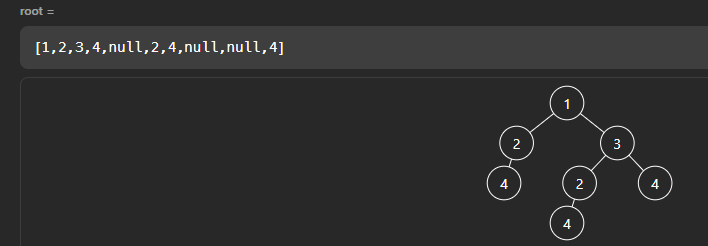

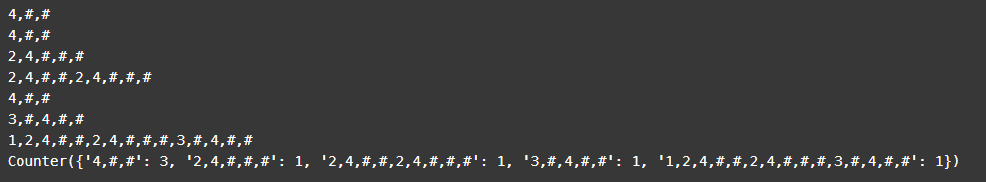

### 1345. Jump Game IV
Given an array of integers arr, you are initially positioned at the first index of the array.

In one step you can jump from index i to index:

- i + 1 where: i + 1 < arr.length.
- i - 1 where: i - 1 >= 0.
- j where: arr[i] == arr[j] and i != j.

Return the minimum number of steps to reach the last index of the array.

Notice that you can not jump outside of the array at any time.

#### Example 1:
Input: arr = [100,-23,-23,404,100,23,23,23,3,404] <br>
Output: 3 <br>
Explanation: You need three jumps from index 0 --> 4 --> 3 --> 9. Note that index 9 is the last index of the array.

In [24]:
arr = [100,-23,-23,404,100,23,23,23,3,404]

In [38]:
# graph + BFS
def minJumps(arr):
    n = len(arr)
    if n == 1:
        return 0
    
    from collections import defaultdict, deque
    graph = defaultdict(list)
    for i, num in enumerate(arr):
        graph[num].append(i)
    print(graph)
    
    level = deque()
    seen = [False] * n
    steps = 0
    level.append(0)
    seen[0] = True
    
    while level:
        m = len(level)
        while m > 0:
            curNode = level.popleft()
            print('curNode', curNode)
            m -= 1
            if curNode == n-1:
                return steps
            nexNodes = graph[arr[curNode]]
            if curNode+1 < n:
                nexNodes.append(curNode+1)
            if curNode-1 >= 0:
                nexNodes.append(curNode-1)
            print('nexNodes', nexNodes)
            for nexNode in nexNodes:
                if not seen[nexNode]:
                    level.append(nexNode)
                    seen[nexNode] = True
            nexNodes.clear()
        steps += 1
minJumps(arr)

defaultdict(<class 'list'>, {100: [0, 4], -23: [1, 2], 404: [3, 9], 23: [5, 6, 7], 3: [8]})
curNode 0
nexNodes [0, 4, 1]
curNode 4
nexNodes [5, 3]
curNode 1
nexNodes [1, 2, 2, 0]
curNode 5
nexNodes [5, 6, 7, 6, 4]
curNode 3
nexNodes [3, 9, 4, 2]
curNode 2
nexNodes [3, 1]
curNode 6
nexNodes [7, 5]
curNode 7
nexNodes [8, 6]
curNode 9


3

### 101. Symmetric Tree
Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

#### Example 1:

<img src='https://assets.leetcode.com/uploads/2021/02/19/symtree1.jpg' width=200>

Input: root = [1,2,2,3,4,4,3]<br>
Output: true

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class SolutionDFSRecursion:
    def ifSymmetric(self, root):
        if not root:
            return True
        return self.dfs(root.left, root.right)
    
    def dfs(self, root1, root2):
        if root1==None and root2==None:
            return True
        if root1 and root2:
            return root1.val==root2.val and self.dfs(root1.left, root2.right) and self.dfs(root1.right, root2.left)
        return False
    
class SolutionBFSIteration:
    def ifSymmetric(self, root):
        if not root:
            return True
        level = []
        level.append([root.left, root.right])
        
        while level:
            r1, r2 = level.pop()
            if r1 and r2:
                if r1.val != r2.val:
                    return False
                level.append([r1.left, r2.right])
                level.append([r1.right, r2.left])
            elif r1 or r2:
                return False
        return True

### 129. Sum Root to Leaf Numbers
You are given the root of a binary tree containing digits from 0 to 9 only.

Each root-to-leaf path in the tree represents a number.

For example, the root-to-leaf path 1 -> 2 -> 3 represents the number 123.
Return the total sum of all root-to-leaf numbers. Test cases are generated so that the answer will fit in a 32-bit integer.

A leaf node is a node with no children.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2021/02/19/num2tree.jpg' width=200>

- Input: root = [4,9,0,5,1]
- Output: 1026
- Explanation:
- The root-to-leaf path 4->9->5 represents the number 495.
- The root-to-leaf path 4->9->1 represents the number 491.
- The root-to-leaf path 4->0 represents the number 40.
- Therefore, sum = 495 + 491 + 40 = 1026.

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class SolutionDFS: # preorder traversal, time O(n), space O(n)
    def sumNumbers(self, root):
        res = []
        number = ''
        self.dfs(root, res, number)
        return sum(res)
    def dfs(self, root, res, number):
        if root:
            number += str(root.val)
            self.dfs(root.left, res, number)
            self.dfs(root.right, res, number)
            if not root.left and not root.right: # find leaf node (node with no children)
                res.append(int(number))
                number = number[:-1]
                
class SolutionDFS2: # space O(1)
    def sumNumbers(self, root):
        self.res = 0
        def dfs(node, cur):
            if not node:
                return
            cur = cur * 10 + node.val
            if not node.left and not node.right:
                self.res += cur
                return
            dfs(node.left, cur)
            dfs(node.right, cur)
        dfs(root, 0)
        return self.res
    
class SolutionBFS:
    def sumNumbers(self, root):
        from collections import deque
        q = deque([(root, root.val)])
        res = 0
        while q:
            node, cur_sum = q.popleft()
            if node.left:
                q.append((node.left, cur_sum * 10 + node.left.val))
            if node.right:
                q.append((node.right, cur_sum * 10 + node.right.val))
            if not node.left and not node.right:
                res += cur_sum
        return res

### 958. Check Completeness of a Binary Tree
Give the root of a binry tree, determine if it is a complete binary tree

In a complete binary tree, every level, except possibly the last, is completely filled, and all nodes in the last level are as far left as possible. It can have between 1 and 2h nodes inclusive at the last level h.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2018/12/15/complete-binary-tree-1.png' width=200>
Input: root = [1,2,3,4,5,6]<br>
Output: true<br>
Explanation: Every level before the last is full (ie. levels with node-values {1} and {2, 3}), and all nodes in the last level ({4, 5, 6}) are as far left as possible.

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class SolutionBFS: # BFS, time O(n), spae O(n)
    def isCompleteTree(self, root):
        in not root:
            return True
        from collections import deque
        q = deq([root])
        while q[0] is not None: # q[0] is None means we found either the last level or the incomplete level
            # remove first node from th queue
            node = q.popleft()
            # add the left and right children nodes of the current node to the queue
            q.append(node.left)
            q.append(node.right)
        # remove any remaining 'null' nodes from the beginning of the queue
        while q and q[0] is None:
            q.popleft()
        # check if there is any not null node remaining in the queue, if so the tree is not complete
        # alternatively: return not any(q)
    return not bool(q)

class SolutionBFS2: # the key is to check if there is null between nodes
    def isCompleteTree(self, root):
        from collections import deque
        q = deque([root])
        is_null_in_between_nodes = False
        while q:
            total_nodes_in_level = len(q)
            for _ in range(total_nodes_in_level):
                node = q.popleft()
                if node is None:
                    is_null_in_between_nodes = True
                else:
                    if is_null_in_between_nodes:
                        return False
                    q.append(node.left)
                    q.append(node.right)
        return True

### 106. Construct Binary Tree from Inorder and Postorder Traversal

Given two integer arrays inorder and postorder where inorder is the inorder traversal of a binary tree and postorder is the postorder traversal of the same tree, construct and return the binary tree.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2021/02/19/tree.jpg' width=200>
Input: inorder = [9,3,15,20,7], postorder = [9,15,7,20,3] <br>
Output: [3,9,20,null,null,15,7]

In [ ]:
# the end of the postorder list is the root of the tree
# find the location of the root in the inorder list
# the left part is the left sub-tree and the right part is the right sub-tree
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class SolutionRecursive: # time O(n**2), space O(n)
    def buildTree(self, inorder, postorder):
        if not inorder:
            return 
        val = postorder.pop() # pop the last item of the postorder list
        node = TreeNode(val)
        i = inorder.index(val)
        node.right = self.buildTree(inorder[i+1:], postorder)
        node.left = self.buildTree(inorder[:i], postorder)
        return node
    
class SolutionRecursiveHashTable: # time O(n), space O(n)
    def buildTreeHelper(self, postorder, left, right):
        if left > right:
            return None
        val = postorder[self.postorder_index]
        self.postorder_index -= 1
        node = TreeNode(val)
        inorder_pivot_index = self.inorder_index_map[val]
        node.right = self.buildTreeHelper(postorder, inorder_pivot_index+1, right)
        node.left = self.buildTreeHelper(postorder, left, inorder_pivot_index-1)
        
    def buildTree(self, inorder, postorder):
        self.postorder_index = len(postorder)
        self.inorder_index_map = {val:i for i,val in enumerate(inorder)}
        return self.buildTreeHelper(postorder, 0, len(postorder)-1)
    
class SolutionIterative: # time O(n), space O(n)
    def buildTree(self, inorder, postorder):
        if not inorder or not postorder:
            return None
        ip = len(inorder) - 1
        pp = len(postorder) - 1
        # create an empty stack to help build the tree
        st = []
        # Initialize previous node
        prev = None
        # build root node from the end of the postorder list
        root = TreeNone(postoder[pp])
        st.append(root)
        pp -= 1
        # process the rest of the nodes in the postorder list
        while pp >= 0:
            # while the stack is not empty and the top of the stack is the current inorder element
            while st and st[-1].val == inorder[ip]:
                # the top of the stack is the parent node of the current node
                # so pop it off the stack and update prev
                prev = st.pop()
                ip -= 1
            # create a new node for the current postorder element
            new_node = TreeNode(postorder[pp])
            # if prev is not None, the parent of the current node is prev
            # attach the node as the left child of prev
            if prev:
                prev.left = new_node
            # if prev is None, the parent of the current node is the current top of the stack
            # attach the node as the right child of the current top of the stack
            elif st:
                cur_top = st[-1]
                cur_top.right = new_node
            # push the new node onto the stack, reset prev to None
            st.append(new_node)
            prev = None
            pp -= 1
        return root

### 2492. Minimum Score of a Path Between Two Cities
You are given a positive integer n representing n cities numbered from 1 to n. You are also given a 2D array roads where roads[i] = [ai, bi, distancei] indicates that there is a bidirectional road between cities ai and bi with a distance equal to distancei. The cities graph is not necessarily connected.

The score of a path between two cities is defined as the minimum distance of a road in this path.

Return the minimum possible score of a path between cities 1 and n.

Note:

A path is a sequence of roads between two cities.
It is allowed for a path to contain the same road multiple times, and you can visit cities 1 and n multiple times along the path.
The test cases are generated such that there is at least one path between 1 and n.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2022/10/12/graph11.png' width=180>
Input: n = 4, roads = [[1,2,9],[2,3,6],[2,4,5],[1,4,7]]<br>
Output: 5<br>
Explanation: The path from city 1 to 4 with the minimum score is: 1 -> 2 -> 4. The score of this path is min(9,5) = 5.<br>
It can be shown that no other path has less score.

In [8]:
n = 4
roads = [[1,2,9],[2,3,6],[2,4,5],[1,4,7]]

# since there is insured at least one path between 1 and n, just find all nodes connected to 1 and n and find the min dist
def minScore(n, roads): # BFS, time O(n+e), space O(n), n: num of nodes, e: num of edges
    
    from collections import defaultdict, deque
    
    graph = defaultdict(dict)
    for u, v, w in roads:
        graph[u][v] = graph[v][u] = w
    
    res = float('inf')
    visited = set()
    q = deque([1])
    print(graph)
    
    while q:
        node = q.popleft()
        for adj, dist in graph[node].items():
            if adj not in visited:
                visited.add(adj)
                q.append(adj)
            res = min(res, dist)
            print(res, node, visited, q)
            
    return res
    
minScore(n, roads)

defaultdict(<class 'dict'>, {1: {2: 9, 4: 7}, 2: {1: 9, 3: 6, 4: 5}, 3: {2: 6}, 4: {2: 5, 1: 7}})
9 1 {2} deque([2])
7 1 {2, 4} deque([2, 4])
7 2 {1, 2, 4} deque([4, 1])
6 2 {1, 2, 3, 4} deque([4, 1, 3])
5 2 {1, 2, 3, 4} deque([4, 1, 3])
5 4 {1, 2, 3, 4} deque([1, 3])
5 4 {1, 2, 3, 4} deque([1, 3])
5 1 {1, 2, 3, 4} deque([3])
5 1 {1, 2, 3, 4} deque([3])
5 3 {1, 2, 3, 4} deque([])


5

In [18]:
# Union find
class Solution:
    def __init__(self):
        self.root = []
        self.rank = []
        
    def find(self, x):# return the root of the set that contains node x
        # check if node x is the root of its set, if so, return its value
        if x == self.root[x]:
            return x
        # otherwise, update it's parent node to be the root of the set that contains its current parent
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    def createUnion(self, x, y): # merge the sets that contain node x and y, creating a tree-like structure
        # find the roots of the two nodes
        rootX = self.find(x)
        rootY = self.find(y)
        # if the two nodes share the same root, no need to merge
        if rootX == rootY:
            return
        # otherwise, set the parent node of the root with lower rank to the other root
        if self.rank[rootX] < self.rank[rootY]:
            self.root[rootX] = rootY
        elif self.rank[rootX] > self.rank[rootY]:
            self.root[rootY] = rootX
        # if two roots have the same rank, we choose rootX and increase its rank
        else:
            self.root[rootY] = rootX
            self.rank[rootX] += 1
            
    def minScore(self, n, roads):
        # initialize root and rank arrays, let the root of each node be the node itself
        self.root = [i for i in range(n+1)]
        self.rank = [0] * (n + 1)
        res = float('inf')
        # create union sets
        for road in roads:
            self.createUnion(road[0], road[1])
        print(self.rank, self.root)
        # searching through each edge
        for road in roads:
            # find the roots of the sets that contain the node 1
            root1 = self.find(1)
            rootX = self.find(road[0])
            rootY = self.find(road[1])
            if root1 == rootX == rootY: # if the two nodes, x and y, both connect to node 1, update res
                res = min(res, road[2])
        return res
    
ans = Solution()
ans.minScore(n, roads)

[0, 1, 0, 0, 0] [0, 1, 1, 1, 1]


5

In [14]:
def minScore(n, roads): # DFS, time O(n+e), space O(n)
    
    from collections import defaultdict
    
    graph = defaultdict(list)
    for u, v, w in roads:
        graph[u].append([v, w])
        graph[v].append([u, w])
    print(graph)
    
    res = [float('inf')]
    visited = set()
    
    def dfs(node):
        visited.add(node)
        for adj, dist in graph[node]:
            res[0] = min(res[0], dist)
            if adj not in visited:
                dfs(adj)
    dfs(1)
    
    return res[0]
    
minScore(n, roads)

defaultdict(<class 'list'>, {1: [[2, 9], [4, 7]], 2: [[1, 9], [3, 6], [4, 5]], 3: [[2, 6]], 4: [[2, 5], [1, 7]]})


5

### 1319. Number of Operations to Make Network Connected
There are n computers numbered from 0 to n - 1 connected by ethernet cables connections forming a network where connections[i] = [ai, bi] represents a connection between computers ai and bi. Any computer can reach any other computer directly or indirectly through the network.

You are given an initial computer network connections. You can extract certain cables between two directly connected computers, and place them between any pair of disconnected computers to make them directly connected.

Return the minimum number of times you need to do this in order to make all the computers connected. If it is not possible, return -1.

#### Example 1:
<img src="https://assets.leetcode.com/uploads/2020/01/02/sample_1_1677.png" width=512>
Input: n = 4, connections = [[0,1],[0,2],[1,2]]<br>
Output: 1<br>
Explanation: Remove cable between computer 1 and 2 and place between computers 1 and 3.

In [41]:
class Solution: # union find, time O(elogn), space O(n)
    def __init__(self):
        self.root = []
        self.cnt = 0
        
    def find(self, x):
        if x != self.root[x]:
            self.root[x] = self.find(self.root[x])
        return self.root[x]
        
    def createUnion(self, x, y):
        rootX = self.find(x) # O(logn)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX
            self.cnt += 1
        
    def makeConnected(self, n, connections):
        if len(connections) < (n - 1):
            return -1
        
        self.root = [i for i in range(n)]
        
        for u, v in connections:
            self.createUnion(u, v)
            
        print([self.find(i) for i in range(n)]) # update roots, O(nlogn)
        
        # total times of joinning union: self.cnt; total number of isolated clusters: n - self.cnt
        # connections needed to join the isolated clusters: n - self.cnt - 1
        return n - self.cnt - 1      

n, connections = 12, [[1,5],[1,7],[1,2],[1,4],[3,7],[4,7],[3,5],[0,6],[0,1],[0,4],[2,6],[0,3],[0,2],[10,11]]
output = Solution()
output.makeConnected(n, connections)

[0, 0, 0, 0, 0, 0, 0, 0, 8, 9, 10, 10]


3

In [45]:
n, connections = 12, [[1,5],[1,7],[1,2],[1,4],[3,7],[4,7],[3,5],[0,6],[0,1],[0,4],[2,6],[0,3],[0,2],[10,11]]

def makeConnected(n, connections): # DFS, time O(e+n), space O(n)
    if len(connections) < n - 1:
        return -1
    
    from collections import defaultdict
    graph = defaultdict(list)
    for u, v in connections:
        graph[u].append(v)
        graph[v].append(u)
        
    visited = set()
    cluster = 0
    
    def dfs(node):
        if node in visited:
            return 
        visited.add(node)
        for adj in graph[node]:
            dfs(adj)
    cnt = 0
    for i in range(n):
        if i not in visited:
            dfs(i)
            cnt += 1
            print(visited, cnt)
    return cnt - 1
makeConnected(n, connections)        

{0, 1, 2, 3, 4, 5, 6, 7} 1
{0, 1, 2, 3, 4, 5, 6, 7, 8} 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11} 4


3

### 1466. Reorder Routes to Make All Paths Lead to the City Zero
There are n cities numbered from 0 to n - 1 and n - 1 roads such that there is only one way to travel between two different cities (this network form a tree). Last year, The ministry of transport decided to orient the roads in one direction because they are too narrow.

Roads are represented by connections where connections[i] = [ai, bi] represents a road from city ai to city bi.

This year, there will be a big event in the capital (city 0), and many people want to travel to this city.

Your task consists of reorienting some roads such that each city can visit the city 0. Return the minimum number of edges changed.

It's guaranteed that each city can reach city 0 after reorder.

#### Example 1
<img src='https://assets.leetcode.com/uploads/2020/05/13/sample_1_1819.png' width='256'>

Input: n = 6, connections = [[0,1],[1,3],[2,3],[4,0],[4,5]]<br>
Output: 3<br>
Explanation: Change the direction of edges show in red such that each node can reach the node 0 (capital).

In [77]:
n, connections = 5, [[1,0],[1,2],[3,2],[3,4]]

# Treat the graph as undirected. 
#Start a dfs from the root, if you come across an edge in the forward direction, you need to reverse the edge. 

def minReorder(n, connections): # DFS
    from collections import defaultdict
    graph = defaultdict(list)
    for u,v in connections:
        graph[u].append([v, 0])
        graph[v].append([u, 1])
    visited = set()
    cnt = [0]
    def dfs(node):
        if node in visited:
            return
        visited.add(node)
        for adj, flag in graph[node]:
            if adj not in visited and flag==0:
                cnt[0] += 1
            dfs(adj)
    dfs(0)
    return cnt[0]
    
minReorder(n, connections)

defaultdict(<class 'list'>, {1: [[0, 0], [2, 0]], 0: [[1, 1]], 2: [[1, 1], [3, 1]], 3: [[2, 0], [4, 0]], 4: [[3, 1]]})


2

### 2316. Count Unreachable Pairs of Nodes in an Undirected Graph
You are given an integer n. There is an undirected graph with n nodes, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

Return the number of pairs of different nodes that are unreachable from each other.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2022/05/05/tc-2.png' width=256>
Input: n = 7, edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]<br>
Output: 14<br>
Explanation: here are 14 pairs of nodes that are unreachable from each other:
[[0,1],[0,3],[0,6],[1,2],[1,3],[1,4],[1,5],[2,3],[2,6],[3,4],[3,5],[3,6],[4,6],[5,6]].
Therefore, we return 14.

In [95]:
class Solution:
    def __init__(self):
        self.root = []
        self.rank = []
        
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    def createUnion(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX == rootY:
            return
        if self.rank[rootX] < self.rank[rootY]:
            self.root[rootX] = rootY
        elif self.rank[rootY] < self.rank[rootX]:
            self.root[rootY] = rootX
        else:
            self.root[rootY] = rootX
            self.rank[rootX] += 1
            
    def countPairs(self, n, edges):
        self.root = [i for i in range(n)]
        self.rank = [0] * n
        for u, v in edges:
            self.createUnion(u, v)  
        newRoot = [self.find(x) for x in range(n)]
        from collections import Counter
        sumOfNodes = Counter(newRoot)
        ans = 0
        for nodes in sumOfNodes.values():
            ans += nodes * (n - nodes)
#         res = []
#         for root in numOfRoots:
#             res.append(numOfRoots[root])
#         ans = 0
#         for i in range(len(res)):
#             for j in range(i):
#                 ans += res[i] * res[j]
        return ans // 2

n , edges = 7, [[0,2],[0,5],[2,4],[1,6],[5,4]]
res = Solution()
res.countPairs(n, edges)

14

### 2360. Longest Cycle in a Graph
You are given a directed graph of n nodes numbered from 0 to n - 1, where each node has at most one outgoing edge.

The graph is represented with a given 0-indexed array edges of size n, indicating that there is a directed edge from node i to node edges[i]. If there is no outgoing edge from node i, then edges[i] == -1.

Return the length of the longest cycle in the graph. If no cycle exists, return -1.

A cycle is a path that starts and ends at the same node.

 
#### Example 1:
<img src='https://assets.leetcode.com/uploads/2022/06/08/graph4drawio-5.png' width='256'>
Input: edges = [3,3,4,2,3]<br>
Output: 3<br>
Explanation: The longest cycle in the graph is the cycle: 2 -> 4 -> 3 -> 2.<br>
The length of this cycle is 3, so 3 is returned.

In [106]:
class Solution:
    def longestCycle(self, edges):
        ans = -1
        time = 1
        timeVisited = [0] * len(edges)
        
        for i, edge in enumerate(edges):
            if timeVisited[i]:
                continue
            startTime = time
            u = i
            print(u)
            while u != -1 and not timeVisited[u]:
                timeVisited[u] = time
                time += 1
                u = edges[u]
            print(timeVisited, startTime)
            if u != -1 and timeVisited[u] >= startTime:
                ans = max(ans, time - timeVisited[u])
        return ans
        
edges = [3,3,4,2,3]
res = Solution()
res.longestCycle(edges)

0
[1, 0, 3, 2, 4] 1
1
[1, 5, 3, 2, 4] 5


3

### 1254. Number of Closed Islands
Given a 2D grid consists of 0s (land) and 1s (water).  An island is a maximal 4-directionally connected group of 0s and a closed island is an island totally (all left, top, right, bottom) surrounded by 1s.

Return the number of closed islands.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2019/10/31/sample_3_1610.png' width=256>

**Input**: grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]] <br>
**Output**: 2 <br>
**Explanation**:  <br>
Islands in gray are closed because they are completely surrounded by water (group of 1s).

In [2]:
# DFS, time O(m*n), space O(1)
class Solution:
    def dfs(self, i, j, grid): # DFS, mark visited 'land' as 'water'
        n, m = len(grid), len(grid[0])
        if i < 0 or i >=n or j < 0 or j >= m or grid[i][j] != 0:
            return
        grid[i][j] = 1
        
        for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
            nx, ny = i + dx, j + dy
            self.dfs(nx, ny, grid)
        
    def closedIsland(self, grid):
        n, m = len(grid), len(grid[0])
        
        for i in range(n): # mark 'lands' connected to boundaries to 'water'
            for j in range(m):
                if (i*j==0 or i==n-1 or j==m-1) and grid[i][j] == 0:
                    self.dfs(i, j, grid)
        
        res = 0
        # DFS mark remainding 'lands' as 'water'. Each time mark all connected 'lands', so add 1 to res when performed one dfs
        for i in range(1, n-1): 
            for j in range(1, m-1):
                if grid[i][j] == 0:
                    self.dfs(i, j, grid)
                    res += 1
        return res
        
grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
res = Solution()
res.closedIsland(grid)

2

### 1020. Number of Enclaves
You are given an m x n binary matrix grid, where 0 represents a sea cell and 1 represents a land cell.

A move consists of walking from one land cell to another adjacent (4-directionally) land cell or walking off the boundary of the grid.

Return the number of land cells in grid for which we cannot walk off the boundary of the grid in any number of moves.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2021/02/18/enclaves1.jpg' width=200>

**Input**: grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]<br>
**Output**: 3<br>
**Explanation**: There are three 1s that are enclosed by 0s, and one 1 that is not enclosed because its on the boundary.

In [3]:
# find 'land cells' not connected to the boundaries
# DFS, time O(nm), space O(1)

class Solution: 
    
    def dfs(self, i, j, grid):
        n, m = len(grid), len(grid[0])
        if i<0 or i>=n or j<0 or j>=m or grid[i][j]!= 1: # if outside boundary or is not 'land cell'
            return
        grid[i][j] = 0 # turn 'land cell' into 'sea cell'
        for di, dj in ((1,0), (-1,0), (0,1), (0,-1)):
            self.dfs(i+di, j+dj, grid)
            
    def numEnclaves(self, grid):
        n, m = len(grid), len(grid[0])
        for i in range(n):
            for j in range(m):
                if (i*j==0 or i==n-1 or j==m-1) and grid[i][j]==1:
                    # turn all 'land cells' connetced to the boundaries into 'sea cell'
                    self.dfs(i, j, grid)
        res = 0
        for i in range(1, n-1):
            for j in range(1, m-1):
                if grid[i][j] == 1:
                    res += 1
        return res
grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
ans = Solution()
ans.numEnclaves(grid)

3

In [13]:
# BFS 
def numEnclaves(grid):
    from collections import deque
    n, m = len(grid), len(grid[0])
    
    def inside(x, y):
        return 0<=x<n and 0<=y<m
    
    visited = [row[:] for row in grid]
    q = deque()
    for i in range(n):
        for j in range(m):
            if (i*j==0 or i==n-1 or j==m-1) and visited[i][j]==1:
                q.append((i, j))
                visited[i][j] = 0
    while q:
        i, j = q.popleft()
        for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
            if inside(i+dx, j+dy) and visited[i+dx][j+dy]==1:
                visited[i+dx][j+dy] = 0
                q.append((i+dx, j+dy))
    return sum(sum(visited, []))
    
grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
numEnclaves(grid)

deque([(1, 0)])


3

### 133. Clone Graph
Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.

Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with val == 1, the second node with val == 2, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2019/11/04/133_clone_graph_question.png' width=400>

**Input**: adjList = [[2,4],[1,3],[2,4],[1,3]]<br>
**Output**: [[2,4],[1,3],[2,4],[1,3]]<br>
**Explanation**: There are 4 nodes in the graph.<br>
- 1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
- 2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).
- 3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
- 4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).

In [ ]:
class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

In [ ]:
# BFS, time O(E+V), space O(V); V:vertices; E:edges
class Solution:
    def cloneGraph(self, node):
        if not node: # corner case
            return node
        from collections import deque
        q = deque([node])
        # create a hash dic to track cloned/visited nodes
        clones = {node.val: Node(node.val, [])}
        # BFS to clone nodes
        while q:
            # pop the current node
            cur = q.popleft()
            cur_clone = clones[cur.val]
            for nei in cur.neighbors: # BFS the neighbors
                if nei.val not in clones: # if not cloned/visited, add to clones hash dic and add to queue
                    clones[nei.val] = Node(nei.val, [])
                    q.append(nei)
                # clone neighors to cur_clone node
                cur_clone.neighors.append(clones[nei.val])
        return clones[node.val]

In [ ]:
# DFS
class Solution:
    def dfs(self, node, visited):
        if not node:
            return None
        newNode = Node(node.val)
        visited[node.val] = newNode
        for adjNode in node.neighbors:
            if adjNode not in visited: # if not cloned/visited, dfs to append neighor nodes
                newNode.neighors.append(self.dfs(adjNode, visited))
            else:
                newNode.neighors.append(visited[adjNode.val])
        return newNode
    def cloneGraph(self, node):
        return self.dfs(node, {})

### 1857. Largest Color Value in a Directed Graph
There is a directed graph of n colored nodes and m edges. The nodes are numbered from 0 to n - 1.

You are given a string colors where colors[i] is a lowercase English letter representing the color of the ith node in this graph (0-indexed). You are also given a 2D array edges where edges[j] = [aj, bj] indicates that there is a directed edge from node aj to node bj.

A valid path in the graph is a sequence of nodes x1 -> x2 -> x3 -> ... -> xk such that there is a directed edge from xi to xi+1 for every 1 <= i < k. The color value of the path is the number of nodes that are colored the most frequently occurring color along that path.

Return the largest color value of any valid path in the given graph, or -1 if the graph contains a cycle.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2021/04/21/leet1.png' width=300>

**Input**: colors = "abaca", edges = [[0,1],[0,2],[2,3],[3,4]]<br>
**Output**: 3<br>
**Explanation**: The path 0 -> 2 -> 3 -> 4 contains 3 nodes that are colored "a" (red in the above image).<br>

In [24]:
colors = "abaca"
edges = [[0,1],[0,2],[2,3],[3,2]]

# topological sort, time O(V+E), space O(V+E)
def largestPathValue(colors, edges):
    from collections import deque
    n = len(colors) # number of nodes
    indegrees = [0] * n # marking indegrees of the nodes (0 means heads)
    graph = [[] for _ in range(n)] # create directed graph, storing chidren nodes of the i-th node
    for i, j in edges:
        graph[i].append(j)
        indegrees[j] += 1
    zero_indegree = deque() # tracking the current head nodes
    for i in range(n):
        if indegrees[i] == 0:
            zero_indegree.append(i)
    # create a hash table 'cnt[node][color]', tracking colors counts for paths crossing node i
    cnt = [[0]*26 for _ in range(n)]
    # initialise the hash table with the color of each node itself
    for i in range(n):
        cnt[i][ord(colors[i]) - ord('a')] += 1
    max_cnt = 0
    visited = 0 # detect cycles in the graph
    while zero_indegree: # BFS through all nodes
        u = zero_indegree.popleft() # search from the current head node
        # if finished BFS and all n nodes have been makred as head nodes once, there is no cycle in the graph
        visited += 1 
        print(visited, u, indegrees)
        for v in graph[u]: # BFS children nodes
            for i in range(26): # update the hash table (all color counts for each children node)
                cnt[v][i] = max(cnt[v][i], cnt[u][i] + (ord(colors[v]) - ord('a') ==  i))
            indegrees[v] -= 1 # reduce the indegree of the current node because it has been visited
            if indegrees[v] == 0: # if the current node becomes a head
                zero_indegree.append(v)
        max_cnt = max(max_cnt, max(cnt[u])) # update current max color count
    
    return max_cnt if visited==n else -1
largestPathValue(colors, edges)

1 0 [0, 1, 2, 1, 0]
2 4 [0, 0, 1, 1, 0]
3 1 [0, 0, 1, 1, 0]


-1

In [25]:
y_control_points = [[0, 0.1],[0.49, 0.51],[0.9,1]]
y_control_points[1][0]

0.49

### 1372. Longest ZigZag Path in a Binary Tree
You are given the root of a binary tree.

A ZigZag path for a binary tree is defined as follow:

Choose any node in the binary tree and a direction (right or left).
If the current direction is right, move to the right child of the current node; otherwise, move to the left child.
Change the direction from right to left or from left to right.
Repeat the second and third steps until you can't move in the tree.
Zigzag length is defined as the number of nodes visited - 1. (A single node has a length of 0).

Return the longest ZigZag path contained in that tree.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2020/01/22/sample_1_1702.png' width=200>

**Input**: root = [1,null,1,1,1,null,null,1,1,null,1,null,null,null,1,null,1]<br>
**Output**: 3<br>
**Explanation**: Longest ZigZag path in blue nodes (right -> left -> right).

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution: # DFS solution, going through all node once, time O(n), space O(d), where n=num of nodes, d=max depth
    
    def longestZigZag(self, root):
        
        self.res = 0
        
        def dfs(node, direction, depth):
            self.res = max(self.res, depth)
            if node.left is not None:
                if direction != 'left': # if cur direction is right or none, we can keep going 'zig-zag-ly'
                    dfs(node.left, 'left', depth+1)
                else: # else, we can restart with the cur node as the root
                    dfs(node.left, 'left', 1)
            if node.right is not None
                if direction != 'right':
                    dfs(node.right, 'right', depth+1)
                else:
                    dfs(node.right, 'right', 1)
                    
        dfs(root, '', 0)
        
        return self.res
        

In [ ]:
class Solution: # DFS recursive
    def longestZigZag(self, root):
        def dfs(node, direction, depth):
            if not node:
                return depth
            l = dfs(node.left, 'left', depth+1 if direction != 'left' else 1)
            r = dfs(node.right, 'right', depth+1 if direction != 'right' else 1)
            return max(l, r)
        return dfs(root, '', 0) - 1       

In [ ]:
class Solution: # DFS iterative (or use deque and popleft to become BFS)
    def longestZigZag(self, root):
        res = 0
        q = [(root, '', 0)]
        while q:
            node, direction, depth = q.pop()
            if node:
                res = max(res, depth)
                q.append((node.left, 'left', depth+1 if direction != 'left' else 1))
                q.append((node.right, 'right', depth+1 if direction != 'right' else 1))
        return res

### 662. Maximum Width of Binary Tree
Given the root of a binary tree, return the maximum width of the given tree.

The maximum width of a tree is the maximum width among all levels.

The width of one level is defined as the length between the end-nodes (the leftmost and rightmost non-null nodes), where the null nodes between the end-nodes that would be present in a complete binary tree extending down to that level are also counted into the length calculation.

It is guaranteed that the answer will in the range of a 32-bit signed integer.

#### Example 1:
<img src='https://assets.leetcode.com/uploads/2022/03/14/maximum-width-of-binary-tree-v3.jpg' width=200>

**Input**: root = [1,3,2,5,null,null,9,6,null,7] <br>
**Output**: 7 <br>
**Explanation**: The maximum width exists in the fourth level with length 7 (6,null,null,null,null,null,7).

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
# BFS
class Solution:
    def widthOfBinaryTree(self, root):
        # iterate through levels; res = max(res, rightmost_idx - leftmost_idx + 1)
        # for node with idx i, node.left_idx = 2*i+1, node.right_idx = 2*i+2
        from collections import deque
        q = deque([root, 0]) # add the root node and its idx (0)
        res = 0
        while q:
            for i in range(len(q)): # BFS through each level
                node, idx = q.popleft()
                if i == 0:
                    left = idx
                if node.left:
                    q.append((node.left, 2*idx+1))
                if node.right:
                    q.append((node.right, 2*idx+2))
            res = max(res, idx - left + 1)
        return res        

In [ ]:
# DFS
class Solution:
    def widthOfBinaryTree(self, root):
        from collections import defaultdict
        dic = defaultdict(list)
        def dfs(node, level, col):
            if node:
                dic[level].append(col)
                dfs(node.left, level+1, col*2)
                dfs(node.right, level+1, col*2+1)
        dfs(root, 0, 0)
        return max([dic[level][-1] - dic[level][0] + 1 for level in dic])

### 839. Similar String Groups
Two strings X and Y are similar if we can swap two letters (in different positions) of X, so that it equals Y. Also two strings X and Y are similar if they are equal.

For example, "tars" and "rats" are similar (swapping at positions 0 and 2), and "rats" and "arts" are similar, but "star" is not similar to "tars", "rats", or "arts".

Together, these form two connected groups by similarity: {"tars", "rats", "arts"} and {"star"}.  Notice that "tars" and "arts" are in the same group even though they are not similar.  Formally, each group is such that a word is in the group if and only if it is similar to at least one other word in the group.

We are given a list strs of strings where every string in strs is an anagram of every other string in strs. How many groups are there?

#### Example:
**Input**: strs = ["tars","rats","arts","star"] <br>
**Output**: 2

In [17]:
strs = ["tars","rats","arts","star","rsat"]

# Union find, time O(n**2 * m), space O(n), where n=len(strs), m=len(strs[0])
class Solution:
    def __init__(self):
        self.root = []
        self.cnt = 0
        
    def find(self, x):
        if x == self.root[x]:
            return x
        return self.find(self.root[x]) # dfs search the root of x
    
    def createUnion(self, x, y):
        rootX = self.find(x) # find root of string idx x
        rootY = self.find(y) # find root of string idx y
        if rootX == rootY: # if in the same union, do nothing
            return 
        self.root[rootY] = rootX # else, merge the two unions by change the root of rootY to the root of X
        self.cnt -= 1 # intially we have n unions, each time we merge two unions, cnt reduce by 1
        
    def isSimilar(self, x, y):
        diff = 0
        for s1, s2 in zip(x, y):
            if s1 != s2:
                diff += 1
        return diff <= 2
        
    def numSimilarGroups(self, strs):
        n = len(strs)
        self.cnt = n
        self.root = [i for i in range(n)] # assign root for each string idx, initailly we have n unions, space O(n)
        for i in range(n):
            for j in range(i+1, n):
                if self.isSimilar(strs[i], strs[j]):
                    self.createUnion(i, j) # create union of idx of similar strings
        print(self.root)
        return self.cnt

res = Solution()
res.numSimilarGroups(strs)

[0, 0, 0, 3, 4]


3

In [18]:
# Union find with rank array
class Solution:
    def __init__(self):
        self.root = []
        self.rank = []
        self.cnt = 0
        
    def find(self, x):
        if x == self.root[x]:
            return x
        return self.find(self.root[x]) # dfs search the root of x
    
    def createUnion(self, x, y):
        rootX = self.find(x) # find root of string idx x
        rootY = self.find(y) # find root of string idx y
        if self.rank[rootY] > self.rank[rootX]:
            self.root[rootX] = rootY
        elif self.rank[rootX] > self.rank[rootY]:
            self.root[rootY] = rootX
        else:
            self.root[rootY] = rootX
            self.rank[rootX] += 1
        self.cnt -= 1 # intially we have n unions, each time we merge two unions, cnt reduce by 1
        
    def isSimilar(self, x, y):
        diff = sum([1 for char1, char2 in zip(x, y) if char1 != char2])
        return diff == 2 or diff == 0
        
    def numSimilarGroups(self, strs):
        n = len(strs)
        self.cnt = n
        self.root = [i for i in range(n)] # assign root for each string idx, initailly we have n unions, space O(n)
        self.rank = [0] * n
        for i in range(n):
            for j in range(i+1, n):
                if self.isSimilar(strs[i], strs[j]):
                    self.createUnion(i, j) # create union of idx of similar strings
        print(self.root, self.rank)
        return self.cnt

res = Solution()
res.numSimilarGroups(strs)

[0, 0, 0, 3, 4] [1, 0, 0, 0, 0]


3

In [19]:
# DFS, time O(n**2 * m), space O(n)
class Solution:
    def dfs(self, i, strs, visited):
        visited[i] = True
        for j in range(len(strs)):
            if visited[j]:
                continue
            if self.isSimilar(strs[i], strs[j]):# dfs all similar strs to strs[i] and mark them as visited
                self.dfs(j, strs, visited)
        
    def isSimilar(self, x, y):
        diff = sum([1 for char1, char2 in zip(x, y) if char1 != char2])
        return diff == 0 or diff == 2
    
    def numSimilarGroups(self, strs):
        cnt = 0
        n = len(strs)
        visited = [False] * n
        for i in range(n):
            if visited[i]:
                continue
            cnt += 1 # add a new group when a non-visited str appears, meaning it is not similar to any previous groups
            self.dfs(i, strs, visited)
        return cnt
    
res = Solution()
res.numSimilarGroups(strs)

3

In [20]:
# BSF of a graph, time O(n**2 * m), space O(n)
class Solution:
    def isSimilar(self, x, y):
        diff = sum([1 for char1, char2 in zip(x, y) if char1 != char2])
        return diff == 0 or diff == 2
    
    def bfs(self, i, visited, adj):
        from collections import deque
        q = deque()
        q.append(i)
        visited[i] = True
        while q:
            idx = q.popleft()
            for j in adj[idx]:
                if not visited[j]:
                    visited[j] = True
                    q.append(j)
     
    def numSimilarGroups(self, strs):
        # creating graph
        n = len(strs)
        adj = [[] for _ in range(n)]
        for i in range(n):
            for j in range(i+1, n):
                if self.isSimilar(strs[i], strs[j]):
                    adj[i].append(j)
                    adj[j].append(i)
        # BFS
        visited = [False] * n
        cnt = 0
        for i in range(n):
            if not visited[i]:
                self.bfs(i, visited, adj)
                cnt += 1
        return cnt
        
res = Solution()
res.numSimilarGroups(strs)

3

### 1697. Checking Existence of Edge Length Limited Paths
An undirected graph of n nodes is defined by edgeList, where edgeList[i] = [ui, vi, disi] denotes an edge between nodes ui and vi with distance disi. Note that there may be multiple edges between two nodes.

Given an array queries, where queries[j] = [pj, qj, limitj], your task is to determine for each queries[j] whether there is a path between pj and qj such that each edge on the path has a distance strictly less than limitj .

Return a boolean array answer, where answer.length == queries.length and the jth value of answer is true if there is a path for queries[j] is true, and false otherwise.


#### Example:
<img src='https://assets.leetcode.com/uploads/2020/12/08/q.png' width=256>

**Input**: n = 5, edgeList = [[0,1,10],[1,2,5],[2,3,9],[3,4,13]], queries = [[0,4,14],[1,4,13]] <br>
**Outpu**t: [true,false] <br>
Exaplanation: The above figure shows the given graph.

In [36]:
class Solution: # union find, time O(nlogn + mlogm), n,m = len(edgeList), len(queries), space O(n)
    
    def __init__(self):
        self.root = []
        self.rank = []
        
    def find(self, x):
        if x == self.root[x]:
            return x
        return self.find(self.root[x])
    
    def createUnion(self, x, y):
        rootX, rootY = self.find(x), self.find(y)
        if self.rank[rootY] > self.rank[rootX]:
            self.root[rootX] = rootY
        elif self.rank[rootX] > self.rank[rootY]:
            self.root[rootY] = rootX
        else:
            self.root[rootY] = rootX
            self.rank[rootX] += 1
            
    def distanceLimitedPathsExist(self, n, edgeList, queries):
        self.root = [i for i in range(n)]
        self.rank = [0] * n
        
        edgeList.sort(key=lambda x:x[2]) # sort edges by distance
        queries = [querie + [i] for i, querie in enumerate(queries)] # add idx to queries
        queries.sort(key=lambda x:x[2]) # sort queries by distance
        
        res = [False] * len(queries)
        j = 0
        
        for u, v, d, i in queries:
            while j < len(edgeList) and edgeList[j][2] < d: # add new nodes with d_old < edge_dis < d_cur to the unions 
                self.createUnion(edgeList[j][0], edgeList[j][1])
                j += 1
            res[i] = self.find(u) == self.find(v) # check if u and v are in the same union
        return res
        
    
n, edgeList, queries = 5, [[0,1,10],[1,2,5],[2,3,9],[3,4,13]], [[0,4,14],[1,4,13]]
ans = Solution()
ans.distanceLimitedPathsExist(n, edgeList, queries)

[True, False]

### 1579. Remove Max Number of Edges to Keep Graph Fully Traversable
Alice and Bob have an undirected graph of n nodes and three types of edges:

Type 1: Can be traversed by Alice only.
Type 2: Can be traversed by Bob only.
Type 3: Can be traversed by both Alice and Bob.
Given an array edges where edges[i] = [typei, ui, vi] represents a bidirectional edge of type typei between nodes ui and vi, find the maximum number of edges you can remove so that after removing the edges, the graph can still be fully traversed by both Alice and Bob. The graph is fully traversed by Alice and Bob if starting from any node, they can reach all other nodes.

Return the maximum number of edges you can remove, or return -1 if Alice and Bob cannot fully traverse the graph.

#### Example: 
<img src='https://assets.leetcode.com/uploads/2020/08/19/ex1.png' width=180>

**Input**: n = 4, edges = [[3,1,2],[3,2,3],[1,1,3],[1,2,4],[1,1,2],[2,3,4]] <br>
**Output**: 2 <br>
**Explanation**: If we remove the 2 edges [1,1,2] and [1,1,3]. The graph will still be fully traversable by Alice and Bob. Removing any additional edge will not make it so. So the maximum number of edges we can remove is 2

In [37]:
# union find, time O(mlogm), space O(n), m = len(edges)
class UnionFind:
    def __init__(self, n):
        self.root = [i for i in range(n)]
        self.rank = [0] * n
    def find(self, x):
        if x == self.root[x]:
            return x
        return self.find(self.root[x])
    def createUnion(self, x, y):
        rootX, rootY = self.find(x), self.find(y)
        if rootX == rootY:
            return True # x and y are already in the same union, return true to delete the cur edge
        else:
            if self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            elif self.rank[rootY] < self.rank[rootX]:
                self.root[rootY] = rootX
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1
            return False # return false to keep the cur edge
class Solution:
    def maxNumEdgesToRemove(self, n, edges):
        alice, bob, delete = 0, 0 , 0
        aliceUnion = UnionFind(n + 1) # create a union of nodes that alice can reach, node idx starts from 1
        bobUnion = UnionFind(n + 1) # create a union of nodes that bob can reach
        edges.sort(reverse=True) # create unions using type 3 edges first, then type 2, finally type 1
        for t, u, v in edges:
            if t == 3: # create union using type 3 edges first
                if aliceUnion.createUnion(u, v): # if u and v already in the same union for alice, delete the edge
                    delete += 1
                else: # if u and v are not in alice's union, add them to bob's union
                    bobUnion.createUnion(u, v) 
                    alice += 1 # update num of edges alice can travel
                    bob += 1 # update num of edges bob can travel
            if t == 2: 
                if bobUnion.createUnion(u, v): 
                    delete += 1
                else:
                    bob += 1
            if t == 1:
                if aliceUnion.createUnion(u, v):
                    delete += 1
                else:
                    alice += 1
        # if the num of edges that alice and bob can travel are both n-1, then they can reach all nodes
        # else return -1
        return delete if alice == bob == n-1 else -1
    
edges, n = [[3,1,2],[3,2,3],[1,1,3],[1,2,4],[1,1,2],[2,3,4]], 4
res = Solution()
res.maxNumEdgesToRemove(n, edges)

2

In [38]:
# union find solution 2, in same class
class Solution:
    def __init__(self):
        self.root = []
        self.rank = []
    def find(self, x):
        if x == self.root[x]:
            return x
        return self.find(self.root[x])
    def createUnion(self, x, y):
        rootX, rootY = self.find(x), self.find(y)
        if rootX == rootY:
            return True
        if self.rank[rootX] < self.rank[rootY]:
            self.root[rootX] = rootY
        elif self.rank[rootY] < self.rank[rootX]:
            self.root[rootY] = rootX
        else:
            self.root[rootY] = rootX
            self.rank[rootX] += 1
        return False
    def maxNumEdgesToRemove(self, n, edges):
        self.root = [i for i in range(n + 1)]
        self.rank = [0] * (n + 1)
        alice, bob, delete = 0, 0, 0
        for t, u, v in edges:
            if t == 3:
                if self.createUnion(u, v):
                    delete += 1
                else:
                    alice += 1
                    bob += 1
        rootTmp = self.root[:]
        for t, u, v in edges:
            if t == 1:
                if self.createUnion(u, v):
                    delete += 1
                else:
                    alice += 1
        self.root = rootTmp[:]
        for t, u, v in edges:
            if t == 2:
                if self.createUnion(u, v):
                    delete += 1
                else:
                    bob += 1
        return delete if alice == bob == n-1 else -1
    
edges, n = [[3,1,2],[3,2,3],[1,1,3],[1,2,4],[1,1,2],[2,3,4]], 4
res = Solution()
res.maxNumEdgesToRemove(n, edges)

2